# BANK MARKETING: Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not.

### Business Use Case
    There has been a revenue decline for a Portuguese bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.

### Project Description

    Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.

    You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.


### About The Dataset
The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not. 



#### You are provided with following 2 files:
1.     **train.csv** : Use this dataset to train the model. This file contains all the client and call details as well as the target variable “subscribed”. You have to train your model using this file.
2.     **test.csv** : Use the trained model to predict whether a new set of clients will subscribe the term deposit.


### Dataset Attributes

Here is the description of all the variables:

    1)  Variable: Definition
    2)  ID: Unique client ID
    3)  age: Age of the client
    4)  job: Type of job
    5)  marital: Marital status of the client
    6)  education: Education level
    7)  default: Credit in default.
    8)  housing: Housing loan
    9)  loan: Personal loan
    10) contact: Type of communication
    11) month: Contact month
    12) day_of_week: Day of week of contact
    13) duration: Contact duration
    14) campaign: number of contacts performed during this campaign to the client
    15) pdays: number of days that passed by after the client was last contacted
    16) previous: number of contacts performed before this campaign
    17) poutcome: outcome of the previous marketing campaign


### Output variable (desired target):

   **Subscribed** (target): has the client subscribed a term deposit? (YES/NO)


### Let's Import majorly required Libraries and Later lets import based on requirements

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Enable Grid Automatically
sns.set_style('darkgrid')

#Set Run time configuration font size =15
plt.rcParams['font.size']=15


#Set Run time configuration figure size = (15,8)
plt.rcParams['figure.figsize']=(15,8)

#Set Run Time configuration parameters of back ground color in HEX 
plt.rcParams['figure.facecolor']='87CEEB'

### Import the Data set

#### First Let's Import Train.csv

In [3]:
# Lets Import Data set using the link given in the project description and read it to see number of Rows x Columns
bank_train=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv')
bank_train

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


The Train.csv Dataset contains 31647 Rows and 18 Columns

In [4]:
#Lets check head of the DataFrame retrieved using bank_train.head() for the trainig data
bank_train.head(6)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
5,29390,33,management,single,tertiary,no,0,yes,no,cellular,2,feb,116,3,-1,0,unknown,no


In [5]:
#Lets check tail of the DataFrame retrieved using bank_train.tail()
bank_train.tail()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no
31646,14156,55,management,divorced,secondary,no,204,yes,no,cellular,11,jul,1973,2,-1,0,unknown,yes


#### First Let's Import Test.csv

In [6]:
# Lets Import Data set using the link given in the project description and read it to see number of Rows x Columns
bank_test=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv')
bank_test

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


The Train.csv Dataset contains 13564 Rows and 17 Columns

In [7]:
#Lets check head of the DataFrame retrieved using bank_test.head() for the test data
bank_test.head(8)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
5,16013,32,management,single,tertiary,no,0,yes,no,cellular,22,jul,455,2,-1,0,unknown
6,196,33,blue-collar,single,secondary,no,307,yes,no,unknown,5,may,309,2,-1,0,unknown
7,8516,37,management,married,secondary,no,341,no,no,unknown,3,jun,120,2,-1,0,unknown


In [8]:
#Lets check tail of the DataFrame retrieved using bank_test.tail() for the test data
bank_test.tail(8)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
13556,27122,46,self-employed,married,primary,no,3155,yes,no,cellular,21,nov,271,1,-1,0,unknown
13557,837,30,services,single,secondary,no,-174,yes,no,unknown,7,may,113,1,-1,0,unknown
13558,35237,32,technician,single,secondary,no,129,yes,no,cellular,7,may,213,1,-1,0,unknown
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success
13563,34839,29,admin.,married,secondary,no,2,yes,no,cellular,6,may,339,1,362,1,failure


For the Model Building and finding issues with the data set at various locations and phases we need to do Exploratory Data Analysis (EDA). For that First, Let's start with Non-Graphical Analysis

## Exploratory Data Analysis (EDA)

### Non-Graphical Analysis

In [9]:
#Let's check the dimensions of the data set using shape 
print(bank_train.shape)
print(bank_test.shape)

(31647, 18)
(13564, 17)


The Train Dataset contains 31647 rows and 18 columns containing various values corresponding to the data

The Train Dataset contains 13564 rows and 17 columns containing various values corresponding to the data

In [10]:
#Let's check the names of the Columns for later usage
bank_train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

From the names of the columns we can understand the meaning of each value.
so, let us go for naming the columns as per the information given in the project description

In [11]:
#Let's check the names of the Columns for later usage
bank_test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [12]:
#checking the dimensions of the internet 
bank_train.columns.tolist()

['ID',
 'age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'subscribed']

In [13]:
#checking the dimensions of the internet 
bank_test.columns.tolist()

['ID',
 'age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome']

Just representing the names of the columns as a single list

In [14]:
#Let's check the data types of the columns
bank_train.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [15]:
#Let's check the data types of the columns
bank_test.dtypes

ID            int64
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

IN Train.csv dataset, 
    
    10 Columns have Object Data type and 8 columns have INT64 data type

In Test.csv dataset
    
    9 Columns have Object Data type and 8 columns have INT64 data type

###  Let's check the unique values and all the information in each column

In [16]:
#Gives Unique Values
bank_train['subscribed'].unique()

array(['no', 'yes'], dtype=object)

there are 2 different types of Unique values are there in our target variable. which means that, 

    No - means the customer not subscrbed for term deposit
    Yes - means the customer have subscrbed for term deposit

In [17]:
#Gives Unique Values
bank_test['poutcome'].unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

We can again conclude that there are totally 4 different classes are available within the Target variable

In [18]:
#Gives the total number of Unique Values
bank_train['subscribed'].nunique()

2

In [19]:
#Gives the total number of Unique Values
bank_test['poutcome'].nunique()

4

In [20]:
#Checking the value counts of each Column
for i in bank_train.columns:
    print(bank_train[i].value_counts())
    print("\n")

26110    1
13339    1
39681    1
15135    1
26037    1
        ..
1247     1
15584    1
25376    1
38699    1
14156    1
Name: ID, Length: 31647, dtype: int64


32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: age, Length: 76, dtype: int64


blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64


married     19095
single       8922
divorced     3630
Name: marital, dtype: int64


secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64


no     31062
yes      585
Name: default, dtype: int64


 0        2470
 1         137
 2         109
 4          95
 3          88
          ... 
 15120       1
-713         1
-905         1
 4722  

 from the above we have observed the below value counts:

    Job - unknown - 206 values
    education - unknown - 1314 values
    contact - unknown - 9177 values
    poutcome- unknown - 25929 values and other - 1288 values.
   
   We can remove the 1288 values of others as it does not give any information.

Lets check out the values in test data

In [21]:
#Checking the value counts of each Column
for i in bank_test.columns:
    print(bank_test[i].value_counts())
    print("\n")

38441    1
23664    1
23378    1
18945    1
32574    1
        ..
4606     1
23686    1
35672    1
8550     1
34839    1
Name: ID, Length: 13564, dtype: int64


32    628
34    609
35    580
31    579
33    566
     ... 
95      1
86      1
92      1
89      1
90      1
Name: age, Length: 75, dtype: int64


blue-collar      2890
management       2819
technician       2290
admin.           1540
services         1251
retired           690
entrepreneur      479
self-employed     456
unemployed        398
housemaid         366
student           303
unknown            82
Name: job, dtype: int64


married     8119
single      3868
divorced    1577
Name: marital, dtype: int64


secondary    6978
tertiary     4000
primary      2043
unknown       543
Name: education, dtype: int64


no     13334
yes      230
Name: default, dtype: int64


 0       1044
 1         58
 2         47
 3         46
 4         44
         ... 
-140        1
 6495       1
 8180       1
 3684       1
 4256       1
Name: 

1. Job - unknown - 82
2. education - unknown - 543
3. contact - unknown - 3843
4. poutcome- unknown - 11030 values and other - 552 values.

Here also we have 552 other values in poutcome

In [22]:
# Let's get statistical analysis of Train Datset
bank_train.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [23]:
# Let's get statistical analysis of Test Datset
bank_test.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000
mean,22704.057726,40.887128,1358.496535,15.738646,258.278679,2.759510,41.648555,0.594441
std,12994.043329,10.604108,3082.940623,8.288174,258.488648,3.060928,101.985178,1.998193
min,1.000000,18.000000,-3313.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11546.000000,33.000000,71.000000,8.000000,102.000000,1.000000,-1.000000,0.000000
50%,22782.000000,39.000000,445.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33974.250000,48.000000,1413.250000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,45206.000000,95.000000,98417.000000,31.000000,3253.000000,58.000000,850.000000,55.000000


In [24]:
#Let's check NULL Values in both train and test datasets
bank_train.isnull().sum() 

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

NO Null Values in Train dataset

In [25]:
bank_test.isnull().sum() 

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

It's crystal clear that there are no null values in test dataset

In [26]:
bank_train.isnull().sum().sum()

0

In [27]:
bank_test.isnull().sum().sum()

0

No Need to handle any Null Values since there is no missing column or data in the given both data sets

**Since each customer's ID is distinct, we may eliminate it from the train and test data.**

In [28]:
bank_train.drop('ID', axis=1, inplace=True)
bank_test.drop('ID', axis=1, inplace=True)

Let's Check the unique values counts in each data set once again after droppping the ID Columnc

In [29]:
for i in bank_train.columns:
    x = bank_train[i].value_counts()
    print("\nColumn name is:",i,"and it value is:\n",x)


Column name is: age and it value is:
 32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: age, Length: 76, dtype: int64

Column name is: job and it value is:
 blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64

Column name is: marital and it value is:
 married     19095
single       8922
divorced     3630
Name: marital, dtype: int64

Column name is: education and it value is:
 secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64

Column name is: default and it value is:
 no     31062
yes      585
Name: default, dtype: int64

Column name is: balance and it value is:
  0        2470
 1         137
 2         109
 4          95
 

Lets check out the values in test data

In [30]:
for i in bank_test.columns:
    x = bank_test[i].value_counts()
    print("\nColumn name is:",i,"and it value is:\n",x)


Column name is: age and it value is:
 32    628
34    609
35    580
31    579
33    566
     ... 
95      1
86      1
92      1
89      1
90      1
Name: age, Length: 75, dtype: int64

Column name is: job and it value is:
 blue-collar      2890
management       2819
technician       2290
admin.           1540
services         1251
retired           690
entrepreneur      479
self-employed     456
unemployed        398
housemaid         366
student           303
unknown            82
Name: job, dtype: int64

Column name is: marital and it value is:
 married     8119
single      3868
divorced    1577
Name: marital, dtype: int64

Column name is: education and it value is:
 secondary    6978
tertiary     4000
primary      2043
unknown       543
Name: education, dtype: int64

Column name is: default and it value is:
 no     13334
yes      230
Name: default, dtype: int64

Column name is: balance and it value is:
  0       1044
 1         58
 2         47
 3         46
 4         44
         

### Graphical Analysis

**Data Visualization**

<Axes: xlabel='job', ylabel='count'>

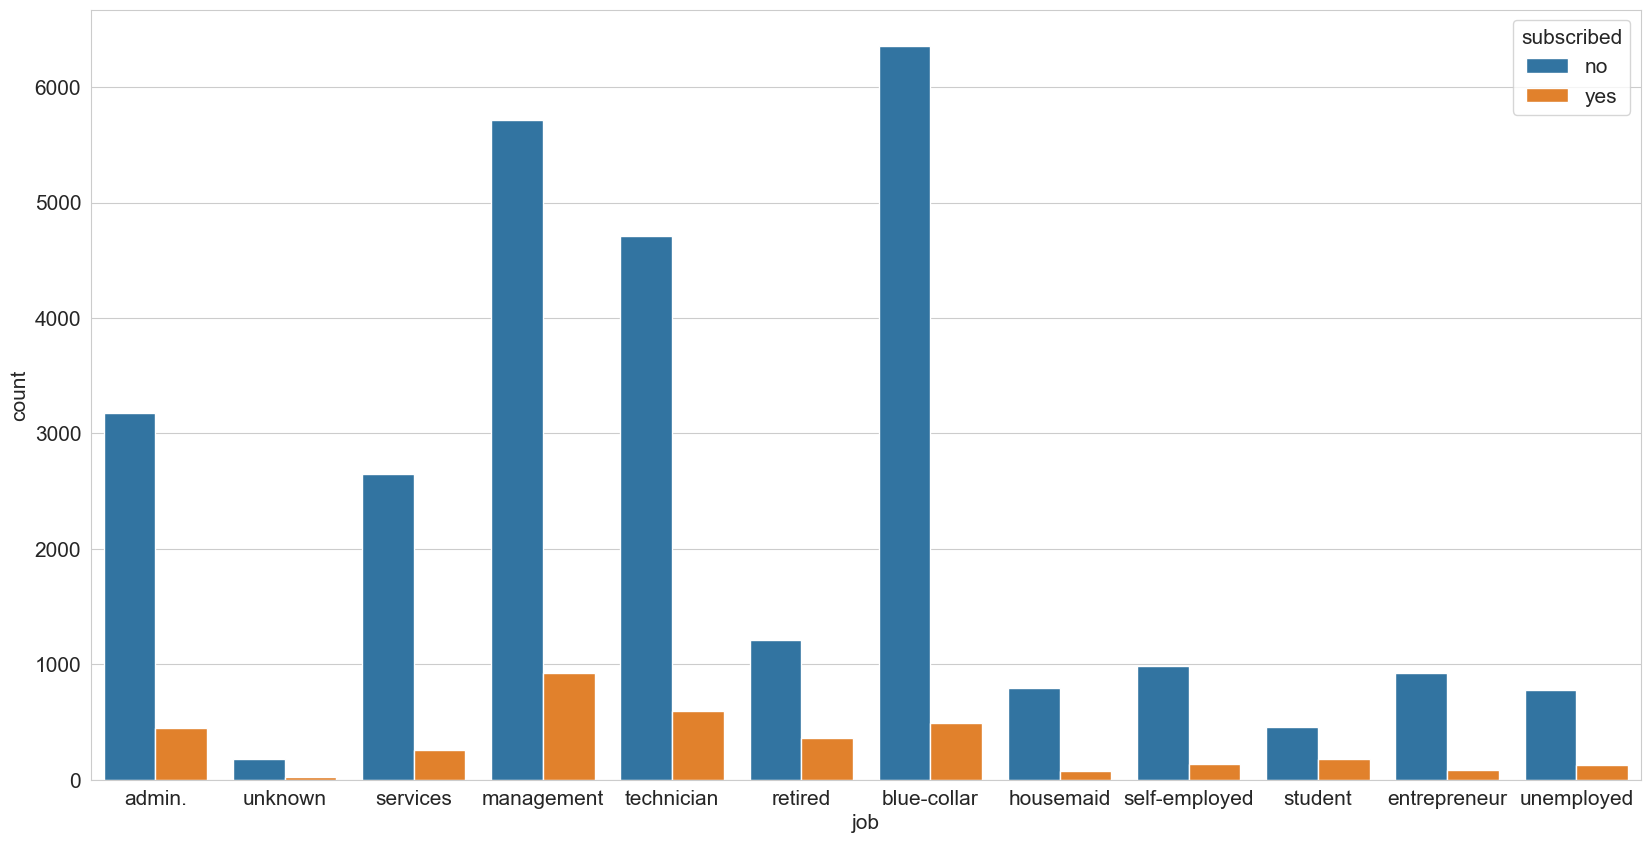

In [31]:
# Check out the number of subscribers to TD depending on their employment profiles.

sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
sns.countplot(x='job', hue = "subscribed", data=bank_train)

**Comments:**

    People in management have the most subscriptions.
    The number of unsubscribers is higher among blue collar workers.


<Axes: xlabel='marital', ylabel='count'>

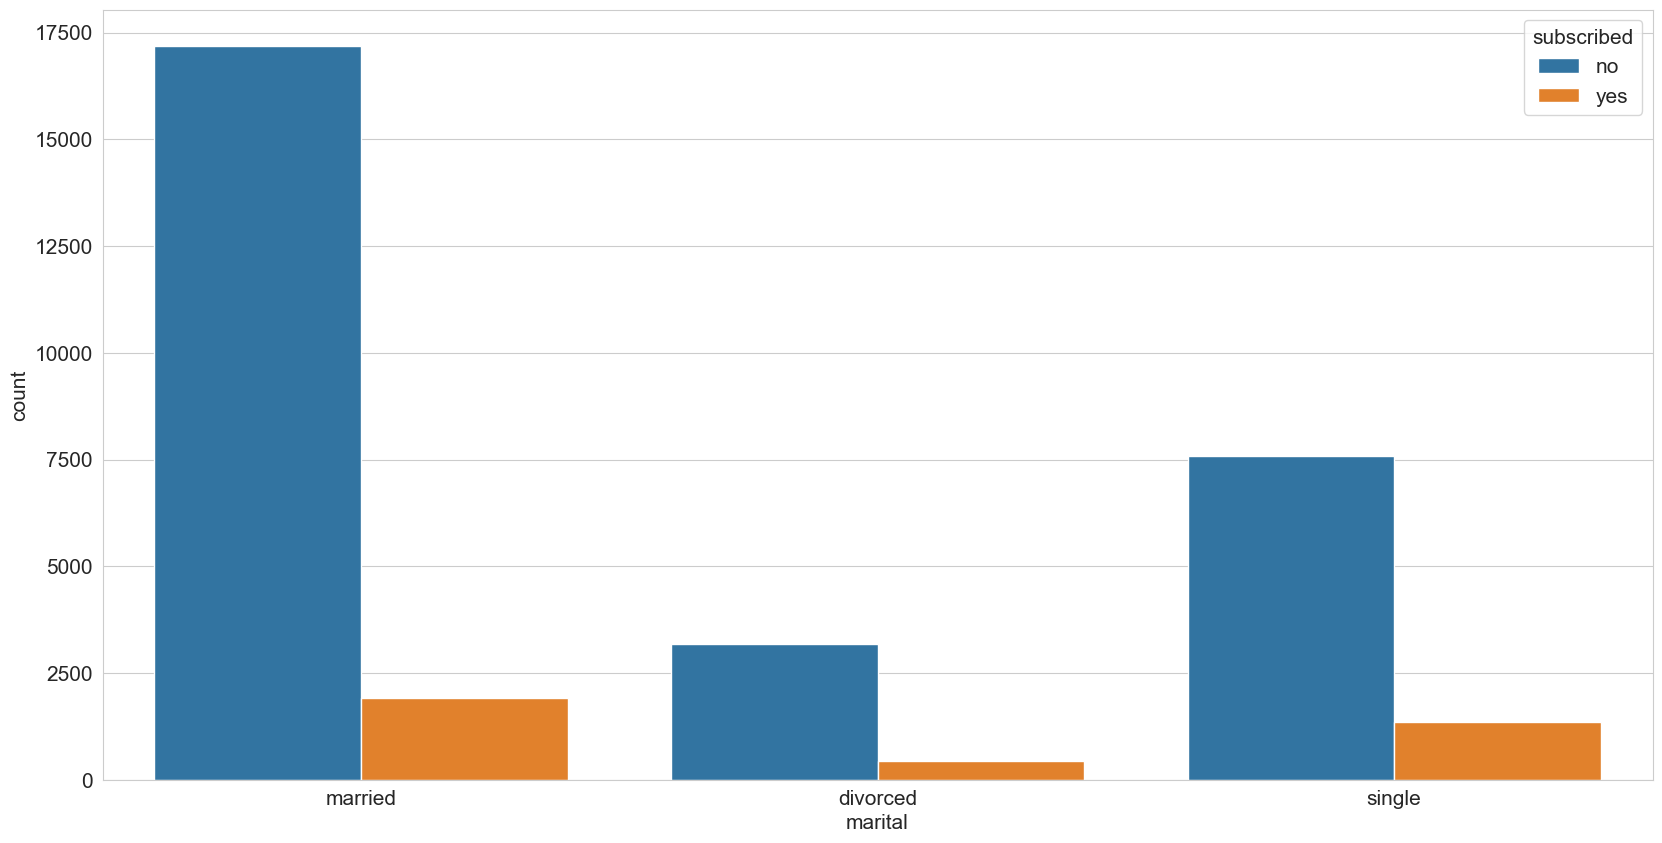

In [32]:
# Here is a breakdown of how many TD subscribers are categorised by their marital status.

plt.figure(figsize=(20,10))
sns.countplot(x='marital', hue = "subscribed", data=bank_train)

**Observations:**

    The highest rates of both subscriptions and cancellations are among married people.
    Divorcees are the ones with the fewest subscript

<Axes: xlabel='education', ylabel='count'>

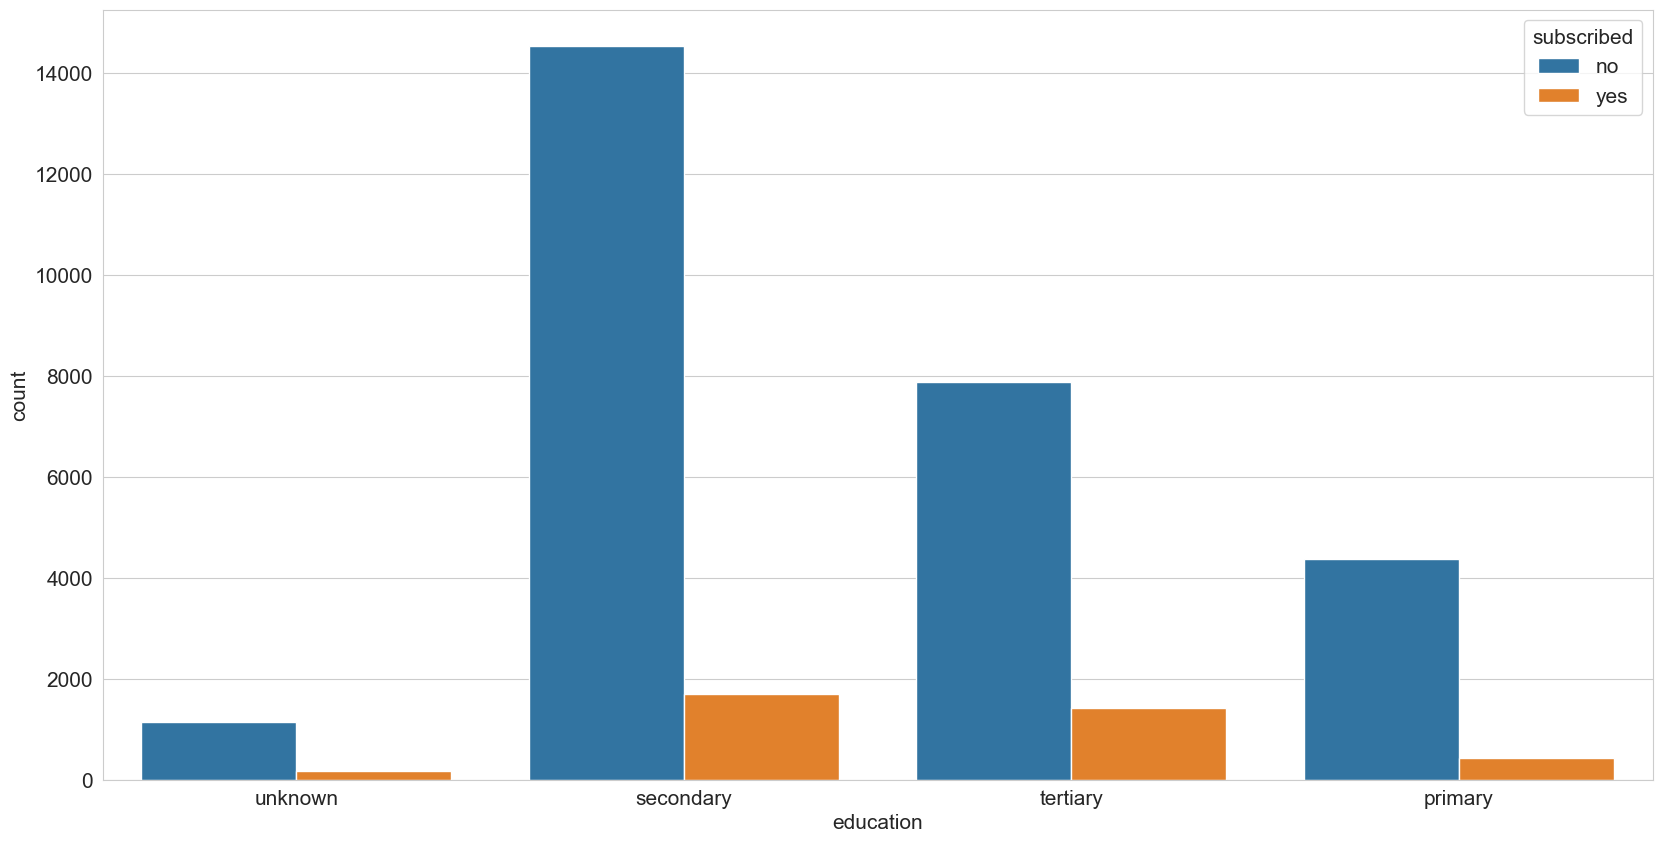

In [33]:
# Let's look at the number of TD subscribers by their level of education.

plt.figure(figsize=(20,10))
sns.countplot(x='education', hue = "subscribed", data=bank_train)

Observation: It is clear that the subscription rises as education does.

<Axes: xlabel='loan', ylabel='count'>

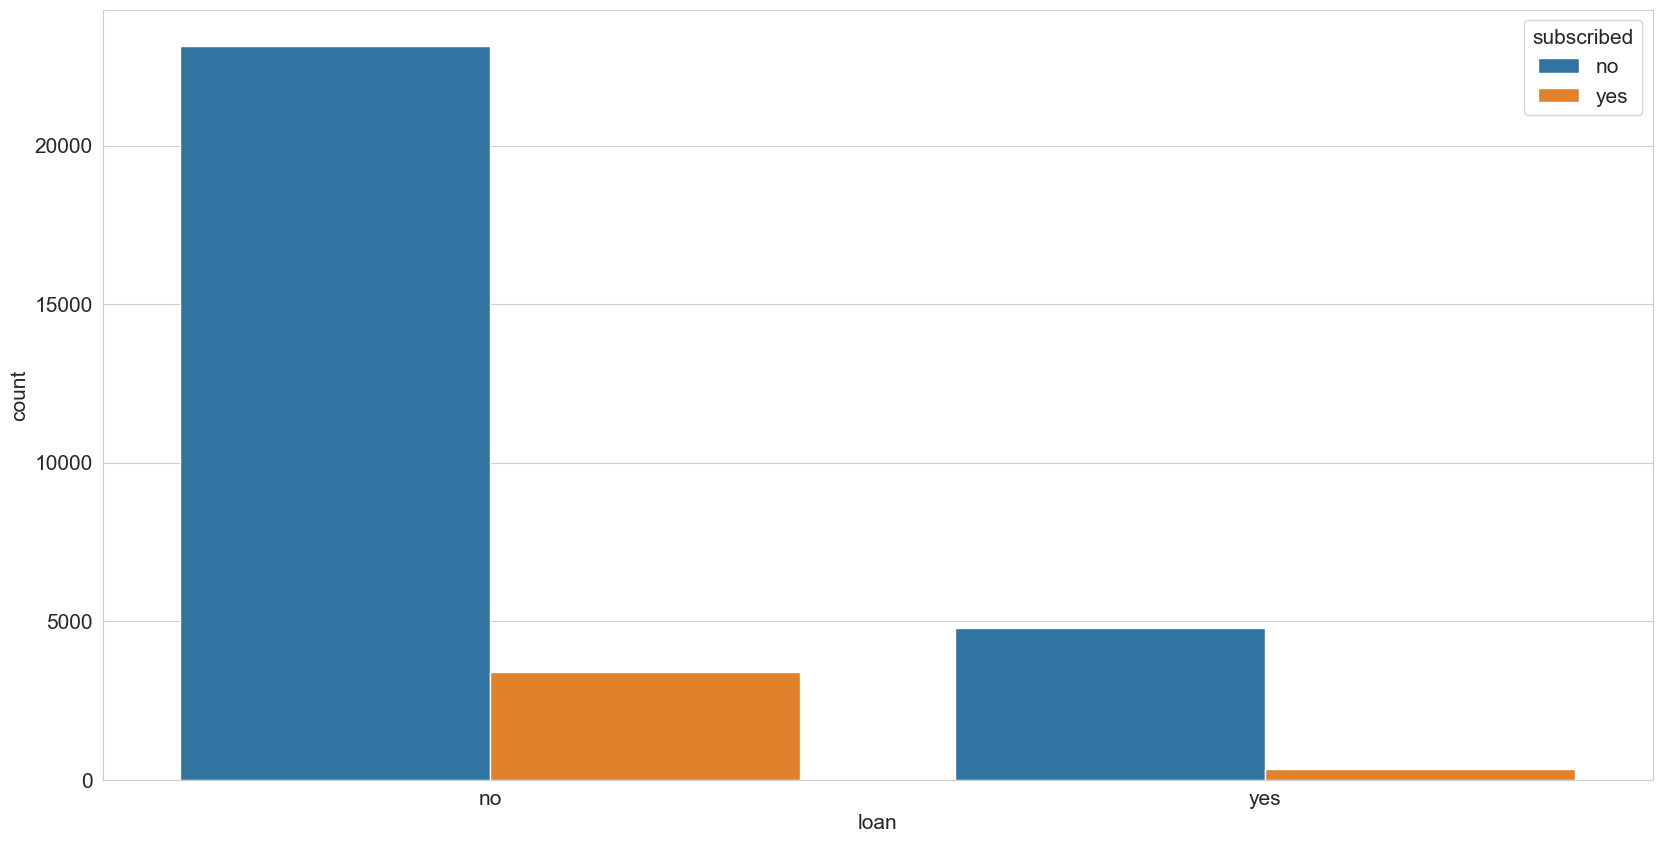

In [34]:
# Let's look at the number of TD customers who signed up based on the status of their personal loans.

plt.figure(figsize=(20,10))
sns.countplot(x='loan', hue = "subscribed", data=bank_train)

Observation: We can notice that subscribers lack personal loans.

<Axes: xlabel='housing', ylabel='count'>

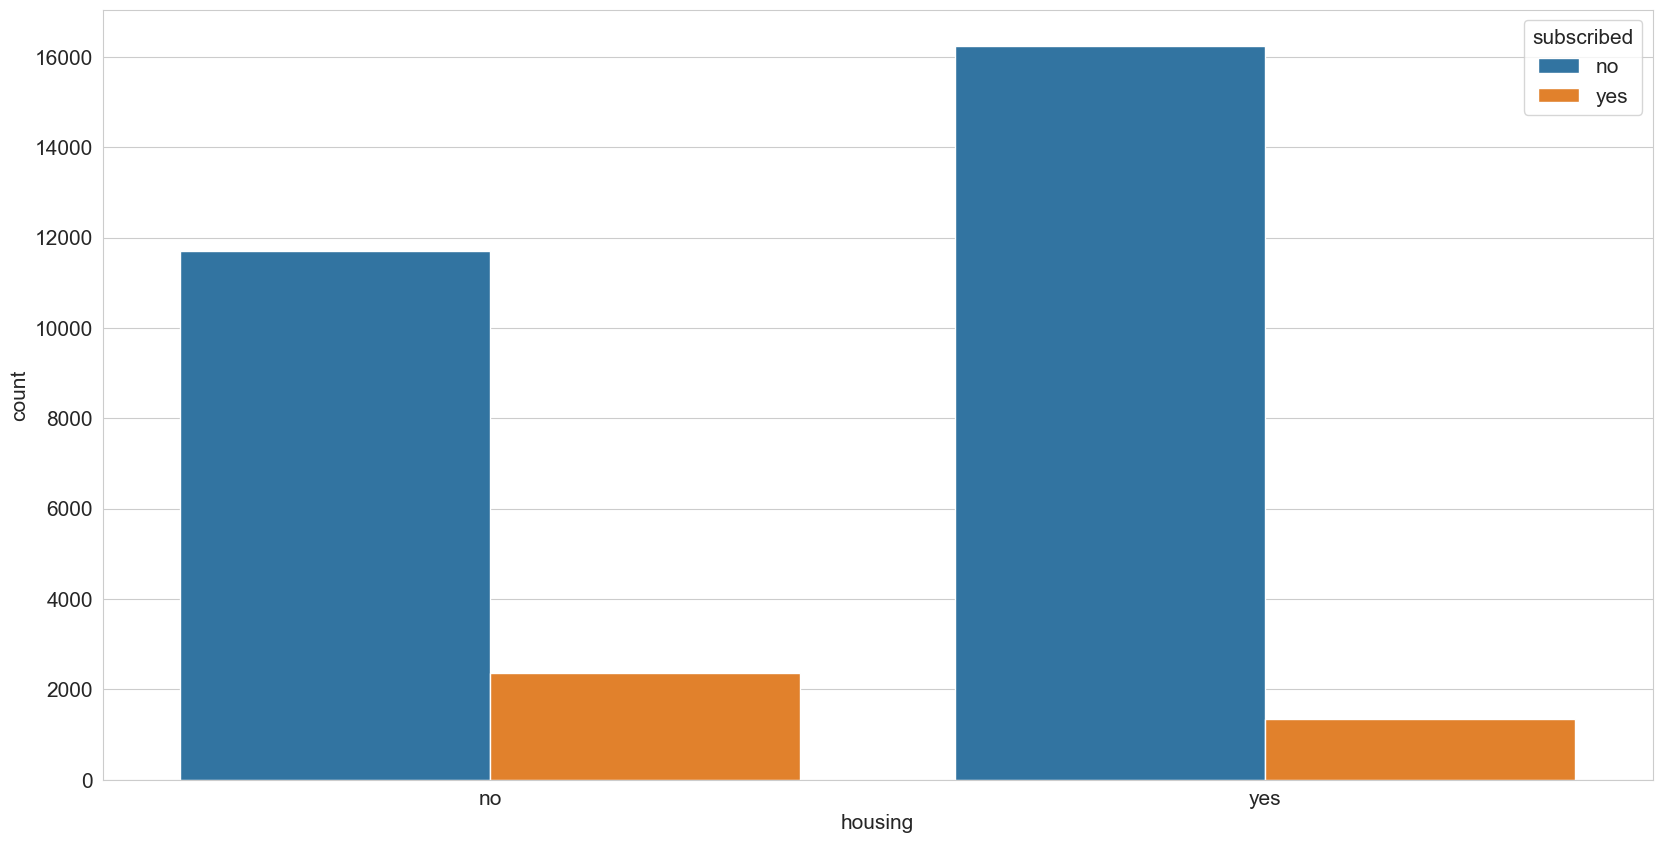

In [35]:
#Let's look at the number of TD customers who signed up based on their housing loan status.
plt.figure(figsize=(20,10))
sns.countplot(x='housing', hue = "subscribed", data=bank_train)

It is identical to a personal loan, as was noted.

<Axes: xlabel='contact', ylabel='count'>

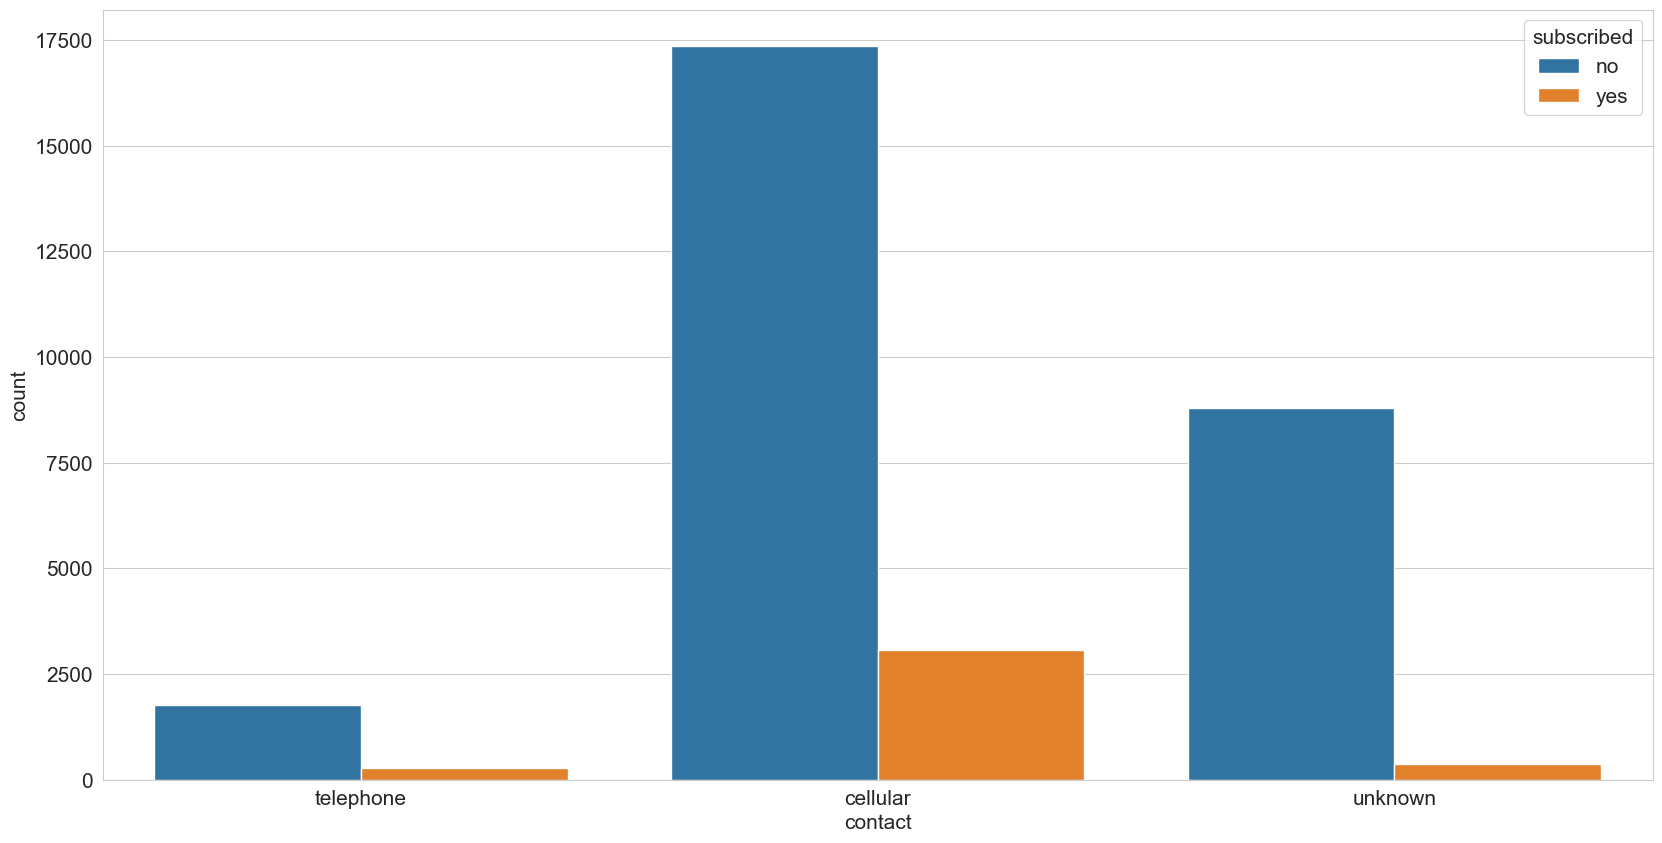

In [36]:
# Let's look at the number of subscribers to TD based on their preferred method of client contact.
plt.figure(figsize=(20,10))
sns.countplot(x='contact', hue = "subscribed", data=bank_train)

Observation: It is clear that the cell phone subscribers of the people who were approached are substantial.

<Axes: xlabel='default', ylabel='count'>

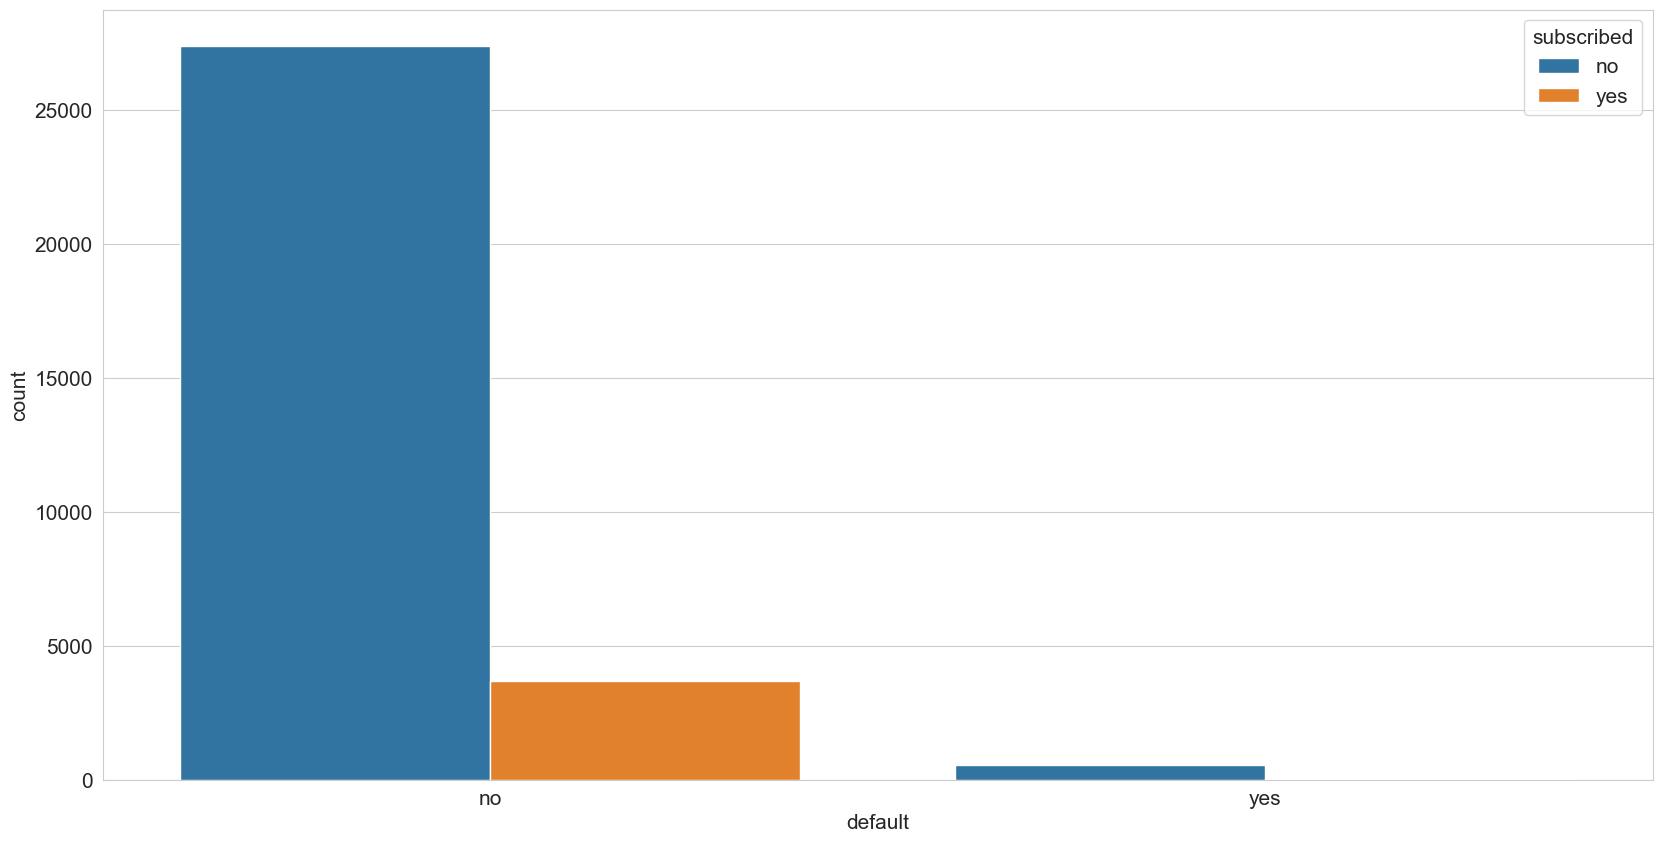

In [37]:
# Let's look at the number of subscribers to FD based on their credit default status.
plt.figure(figsize=(20,10))
sns.countplot(x='default', hue = "subscribed", data=bank_train)

Observation: As we can see, subscribers are those who have never had a default on their credit.

<Axes: xlabel='month', ylabel='count'>

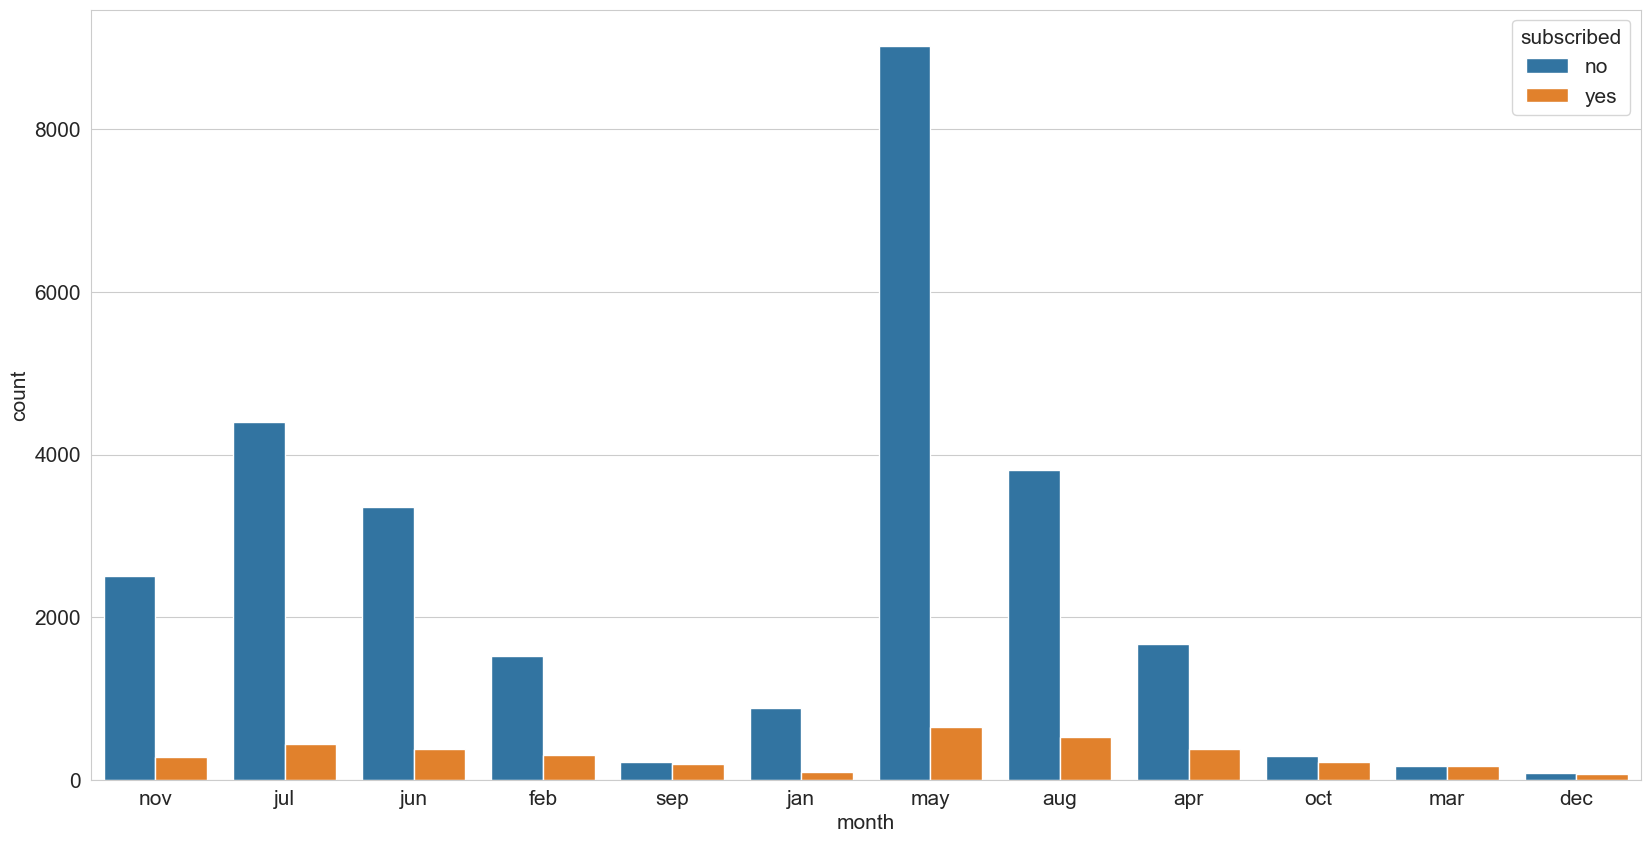

In [38]:
# Let's look at the number of clients that signed up for FD based on their most recent contact.
plt.figure(figsize=(20,10))
sns.countplot(x='month', hue = "subscribed", data=bank_train)

**Observations:**
    
    1. We can observe that May has the biggest amount of subscribers, making it the ideal period for a campaign.
    2. August, April, June, and July are also fairly likely months.
    3. The months with the fewest subscribers are Jan, Dec, and Sep.

<Axes: xlabel='age', ylabel='balance'>

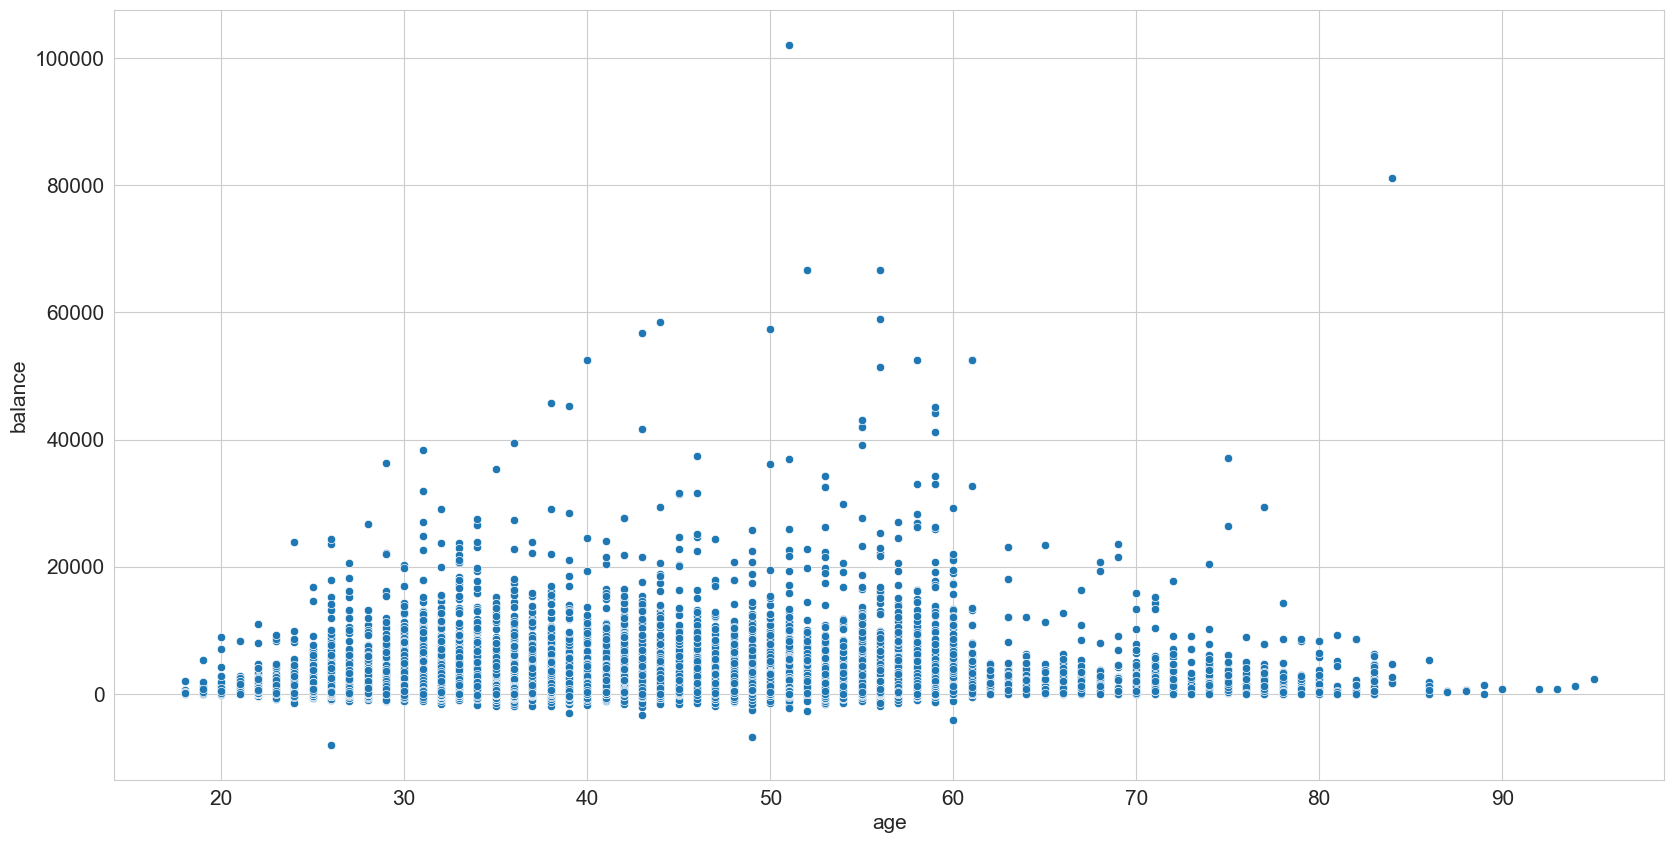

In [39]:
#Let's examine the connection between balance and age.
plt.figure(figsize=(20,10))
sns.scatterplot(x='age',y='balance',data=bank_train)

Observation: It is clear that the link between age and balance is not linear.

<Figure size 2000x1500 with 0 Axes>

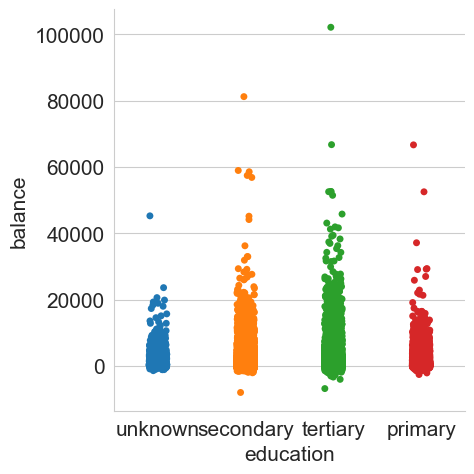

In [40]:
#Let's examine the connection between balance and education.
plt.figure(figsize=(20,15))
sns.catplot(x='education',y='balance',data=bank_train)

As we can see, those with higher levels of education have healthy financial accounts.

<Figure size 2000x1000 with 0 Axes>

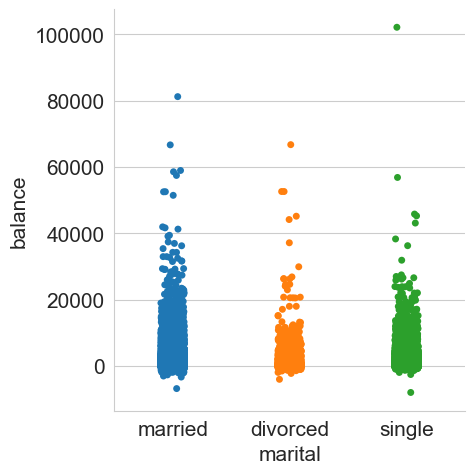

In [41]:
#Let's examine the connection between balance and married status.
plt.figure(figsize=(20,10))
sns.catplot(x='marital',y='balance',data=bank_train)

As may be predicted, divorced people have less money than married or single people.

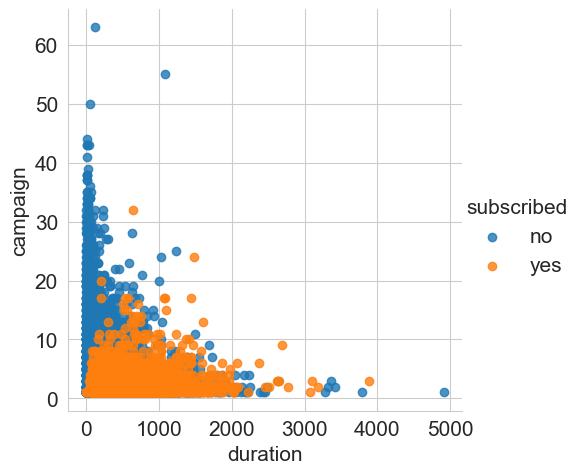

In [42]:
#Let's examine how the campaign's length and impact our target variable.
sns.lmplot(x='duration',y='campaign',hue='subscribed',data=bank_train,fit_reg = False)

As we saw above, we have a high subscription rate when the campaign's (the number of contacts made) duration is short.

The time is measured in seconds. To make it easier to understand, let's convert it to minutes.

In [43]:
bank_train['duration'] = bank_train['duration'].apply(lambda n:n/60).round(2)

In [44]:
#Using the same approach with test data
bank_test['duration'] = bank_test['duration'].apply(lambda n:n/60).round(2)

In [45]:
bank_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,0.73,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,1.52,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,4.00,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,14.45,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,6.33,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,management,single,tertiary,no,0,yes,no,cellular,12,may,1.93,2,-1,0,unknown,no
31643,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,7.30,2,-1,0,unknown,yes
31644,32,management,single,tertiary,no,312,no,no,cellular,7,aug,0.62,3,-1,0,unknown,no
31645,57,technician,married,secondary,no,225,yes,no,telephone,15,may,0.37,7,337,12,failure,no


In [46]:
bank_test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,32,services,married,secondary,no,118,yes,no,cellular,15,may,0.33,6,-1,0,unknown
1,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,6.20,1,-1,0,unknown
2,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,11.27,1,-1,0,unknown
3,57,services,single,primary,no,3777,yes,no,telephone,13,may,1.08,2,-1,0,unknown
4,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,1.85,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,management,married,tertiary,no,45,no,no,cellular,28,aug,2.47,4,-1,0,unknown
13560,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,2.63,1,-1,0,unknown
13561,35,retired,married,primary,no,285,yes,no,cellular,29,jan,2.27,1,-1,0,unknown
13562,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,3.47,2,91,3,success


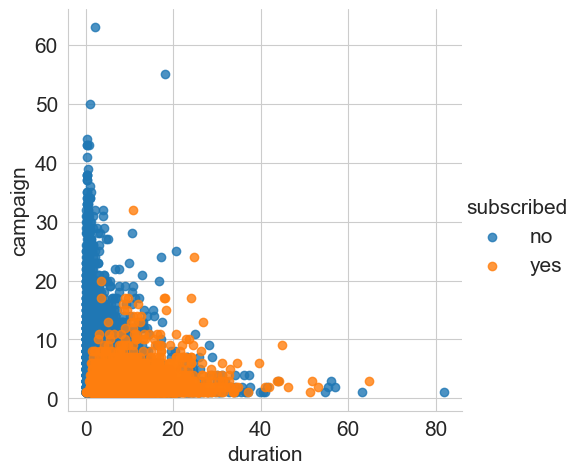

In [47]:
#Let's examine how the campaign's length and impact our target variable.
sns.lmplot(x='duration',y='campaign',hue='subscribed',data=bank_train,fit_reg = False)

It is evident that the duration has been converted to minutes.

## Cleaning the DATA

In this section, we will clean the data that is available in our datasets but contains unknown and other values.

In [48]:
#Dividing numerical and category columns

#For categorical columns, check
cat_col=[]
for i in bank_train.dtypes.index:
    if bank_train.dtypes[i]=="object":
        cat_col.append(i)
print("Categorical Columns: ",cat_col)
print('\n')

#checking for numerical columns
num_col=[]
for i in bank_train.dtypes.index:
    if bank_train.dtypes[i]!="object":
        num_col.append(i)
print("Numerical Columns: ",num_col)
print('\n')

Categorical Columns:  ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed']


Numerical Columns:  ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']




In [49]:
# Since these 1288 additional values in the train data poutcome serve no function, let's eliminate them.
print("Prior to deleting more in-train data, the form is: ",bank_train.shape)
condition1 = bank_train.poutcome == 'other'
bank_train.drop(bank_train[condition1].index, axis = 0, inplace = True)
print(bank_train['poutcome'].value_counts())
print("The shape is obtained by deleting additional inputs from the train data: ",bank_train.shape)

Prior to deleting more in-train data, the form is:  (31647, 17)
unknown    25929
failure     3362
success     1068
Name: poutcome, dtype: int64
The shape is obtained by deleting additional inputs from the train data:  (30359, 17)


Since the unknown values in poutcome are enormous, we won't be treating them.

In [50]:
# Since these 552 additional values from the test data serve no function, let's remove them from poutcome.
print("The shape is checked before deleting additional inputs from test data: ",bank_test.shape)
condition11 = bank_test.poutcome == 'other'
bank_test.drop(bank_test[condition11].index, axis = 0, inplace = True)
print(bank_test['poutcome'].value_counts())
print("The shape is obtained by deleting additional inputs from the train data.: ",bank_test.shape)

The shape is checked before deleting additional inputs from test data:  (13564, 16)
unknown    11030
failure     1539
success      443
Name: poutcome, dtype: int64
The shape is obtained by deleting additional inputs from the train data.:  (13012, 16)


In [51]:
# Let's switch the job and education unknown values to the front fill technique so that we don't lose any data.
bank_train[['job','education']] = bank_train[['job','education']].replace(['unknown'],np.nan)

In [52]:
bank_train.isnull().sum() 

age              0
job            204
marital          0
education     1273
default          0
balance          0
housing          0
loan             0
contact          0
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome         0
subscribed       0
dtype: int64

In [53]:
#modifying the unknown values in test data in the same manner
bank_test[['job','education']] = bank_test[['job','education']].replace(['unknown'],np.nan)

In [54]:
bank_test.isnull().sum() 

age            0
job           82
marital        0
education    519
default        0
balance        0
housing        0
loan           0
contact        0
day            0
month          0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
dtype: int64

In [55]:
bank_train["job"].fillna(method='ffill',inplace=True)
bank_train["education"].fillna(method='ffill',inplace=True)
bank_test["job"].fillna(method='ffill',inplace=True)
bank_test["education"].fillna(method='ffill',inplace=True)

In [56]:
bank_train.isnull().sum() 

age           0
job           0
marital       0
education     1
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

We can still see one value missing in education lets use back fill method.

In [57]:
bank_train["education"].fillna(method='bfill',inplace=True)

In [58]:
bank_train.isnull().sum() 

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [59]:
bank_test.isnull().sum() 

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

## Transforming All Categorical Columns to Numercial Values

In [60]:
# job column
bank_train['job'] = bank_train['job'].replace(['blue-collar'],1)
bank_train['job'] = bank_train['job'].replace(['management'],2)
bank_train['job'] = bank_train['job'].replace(['technician'],3)
bank_train['job'] = bank_train['job'].replace(['admin.'],4)
bank_train['job'] = bank_train['job'].replace(['services'],5)
bank_train['job'] = bank_train['job'].replace(['retired'],6)
bank_train['job'] = bank_train['job'].replace(['self-employed'],7)
bank_train['job'] = bank_train['job'].replace(['entrepreneur'],8)
bank_train['job'] = bank_train['job'].replace(['unemployed'],9)
bank_train['job'] = bank_train['job'].replace(['housemaid'],10)
bank_train['job'] = bank_train['job'].replace(['student'],11)

# marital column
bank_train['marital'] = bank_train['marital'].replace(['single'],1)
bank_train['marital'] = bank_train['marital'].replace(['married'],2)
bank_train['marital'] = bank_train['marital'].replace(['divorced'],3)

# education column
bank_train['education'] = bank_train['education'].replace(['primary'],1)
bank_train['education'] = bank_train['education'].replace(['secondary'],2)
bank_train['education'] = bank_train['education'].replace(['tertiary'],3)

# default column
bank_train['default'] = bank_train['default'].replace(['yes'],1)
bank_train['default'] = bank_train['default'].replace(['no'],0)

# housing column
bank_train['housing'] = bank_train['housing'].replace(['yes'],1)
bank_train['housing'] = bank_train['housing'].replace(['no'],0)

# loan column
bank_train['loan'] = bank_train['loan'].replace(['yes'],1)
bank_train['loan'] = bank_train['loan'].replace(['no'],0)

# contact column
bank_train['contact'] = bank_train['contact'].replace(['cellular'],1)
bank_train['contact'] = bank_train['contact'].replace(['telephone'],2)
bank_train['contact'] = bank_train['contact'].replace(['unknown'],3)

# month column
bank_train['month'] = bank_train['month'].replace(['jan'],1)
bank_train['month'] = bank_train['month'].replace(['feb'],2)
bank_train['month'] = bank_train['month'].replace(['mar'],3)
bank_train['month'] = bank_train['month'].replace(['apr'],4)
bank_train['month'] = bank_train['month'].replace(['may'],5)
bank_train['month'] = bank_train['month'].replace(['jun'],6)
bank_train['month'] = bank_train['month'].replace(['jul'],7)
bank_train['month'] = bank_train['month'].replace(['aug'],8)
bank_train['month'] = bank_train['month'].replace(['sep'],9)
bank_train['month'] = bank_train['month'].replace(['oct'],10)
bank_train['month'] = bank_train['month'].replace(['nov'],11)
bank_train['month'] = bank_train['month'].replace(['dec'],12)

# poutcome column 
bank_train['poutcome'] = bank_train['poutcome'].replace(['failure'],0)
bank_train['poutcome'] = bank_train['poutcome'].replace(['success'],1)
bank_train['poutcome'] = bank_train['poutcome'].replace(['unknown'],2)

# subscribed column
bank_train['subscribed'] = bank_train['subscribed'].replace(['yes'],1)
bank_train['subscribed'] = bank_train['subscribed'].replace(['no'],0)


In [61]:
bank_train.dtypes

age             int64
job             int64
marital         int64
education       int64
default         int64
balance         int64
housing         int64
loan            int64
contact         int64
day             int64
month           int64
duration      float64
campaign        int64
pdays           int64
previous        int64
poutcome        int64
subscribed      int64
dtype: object

As we can see it is changed to integers/numerical columns in the train data.

In [62]:
# Similarly to the test data

# job column
bank_test['job'] = bank_test['job'].replace(['blue-collar'],1)
bank_test['job'] = bank_test['job'].replace(['management'],2)
bank_test['job'] = bank_test['job'].replace(['technician'],3)
bank_test['job'] = bank_test['job'].replace(['admin.'],4)
bank_test['job'] = bank_test['job'].replace(['services'],5)
bank_test['job'] = bank_test['job'].replace(['retired'],6)
bank_test['job'] = bank_test['job'].replace(['self-employed'],7)
bank_test['job'] = bank_test['job'].replace(['entrepreneur'],8)
bank_test['job'] = bank_test['job'].replace(['unemployed'],9)
bank_test['job'] = bank_test['job'].replace(['housemaid'],10)
bank_test['job'] = bank_test['job'].replace(['student'],11)

# marital column
bank_test['marital'] = bank_test['marital'].replace(['single'],1)
bank_test['marital'] = bank_test['marital'].replace(['married'],2)
bank_test['marital'] = bank_test['marital'].replace(['divorced'],3)

# education column
bank_test['education'] = bank_test['education'].replace(['primary'],1)
bank_test['education'] = bank_test['education'].replace(['secondary'],2)
bank_test['education'] = bank_test['education'].replace(['tertiary'],3)

# default column
bank_test['default'] = bank_test['default'].replace(['yes'],1)
bank_test['default'] = bank_test['default'].replace(['no'],0)

# housing column
bank_test['housing'] = bank_test['housing'].replace(['yes'],1)
bank_test['housing'] = bank_test['housing'].replace(['no'],0)

# loan column
bank_test['loan'] = bank_test['loan'].replace(['yes'],1)
bank_test['loan'] = bank_test['loan'].replace(['no'],0)

# contact column
bank_test['contact'] = bank_test['contact'].replace(['cellular'],1)
bank_test['contact'] = bank_test['contact'].replace(['telephone'],2)
bank_test['contact'] = bank_test['contact'].replace(['unknown'],3)

# month column
bank_test['month'] = bank_test['month'].replace(['jan'],1)
bank_test['month'] = bank_test['month'].replace(['feb'],2)
bank_test['month'] = bank_test['month'].replace(['mar'],3)
bank_test['month'] = bank_test['month'].replace(['apr'],4)
bank_test['month'] = bank_test['month'].replace(['may'],5)
bank_test['month'] = bank_test['month'].replace(['jun'],6)
bank_test['month'] = bank_test['month'].replace(['jul'],7)
bank_test['month'] = bank_test['month'].replace(['aug'],8)
bank_test['month'] = bank_test['month'].replace(['sep'],9)
bank_test['month'] = bank_test['month'].replace(['oct'],10)
bank_test['month'] = bank_test['month'].replace(['nov'],11)
bank_test['month'] = bank_test['month'].replace(['dec'],12)

# poutcome column 
bank_test['poutcome'] = bank_test['poutcome'].replace(['failure'],0)
bank_test['poutcome'] = bank_test['poutcome'].replace(['success'],1)
bank_test['poutcome'] = bank_test['poutcome'].replace(['unknown'],2)


In [63]:
 bank_test.dtypes

age            int64
job            int64
marital        int64
education      int64
default        int64
balance        int64
housing        int64
loan           int64
contact        int64
day            int64
month          int64
duration     float64
campaign       int64
pdays          int64
previous       int64
poutcome       int64
dtype: object

In [64]:
bank_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,4,2,2,0,1933,0,0,2,19,11,0.73,2,-1,0,2,0
1,31,4,2,2,0,3,0,0,1,20,7,1.52,2,-1,0,2,0
2,27,5,2,2,0,891,1,0,1,18,7,4.00,1,-1,0,2,0
3,57,2,3,3,0,3287,0,0,1,22,6,14.45,1,84,3,1,1
4,31,3,2,2,0,119,1,0,1,4,2,6.33,1,-1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,2,1,3,0,0,1,0,1,12,5,1.93,2,-1,0,2,0
31643,53,2,3,3,0,380,0,1,1,5,6,7.30,2,-1,0,2,1
31644,32,2,1,3,0,312,0,0,1,7,8,0.62,3,-1,0,2,0
31645,57,3,2,2,0,225,1,0,2,15,5,0.37,7,337,12,0,0


In [65]:
bank_test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,32,5,2,2,0,118,1,0,1,15,5,0.33,6,-1,0,2
1,78,6,3,1,0,2787,0,0,2,1,7,6.20,1,-1,0,2
2,31,7,1,3,0,144,1,0,3,16,5,11.27,1,-1,0,2
3,57,5,1,1,0,3777,1,0,2,13,5,1.08,2,-1,0,2
4,45,1,3,2,0,-705,0,1,3,3,7,1.85,1,-1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,2,2,3,0,45,0,0,1,28,8,2.47,4,-1,0,2
13560,54,1,2,1,0,2281,1,0,3,20,6,2.63,1,-1,0,2
13561,35,6,2,1,0,285,1,0,1,29,1,2.27,1,-1,0,2
13562,29,4,1,2,0,464,0,0,1,9,11,3.47,2,91,3,1


### Outliers Treatment

In [66]:
numerical_cols=bank_train[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']]

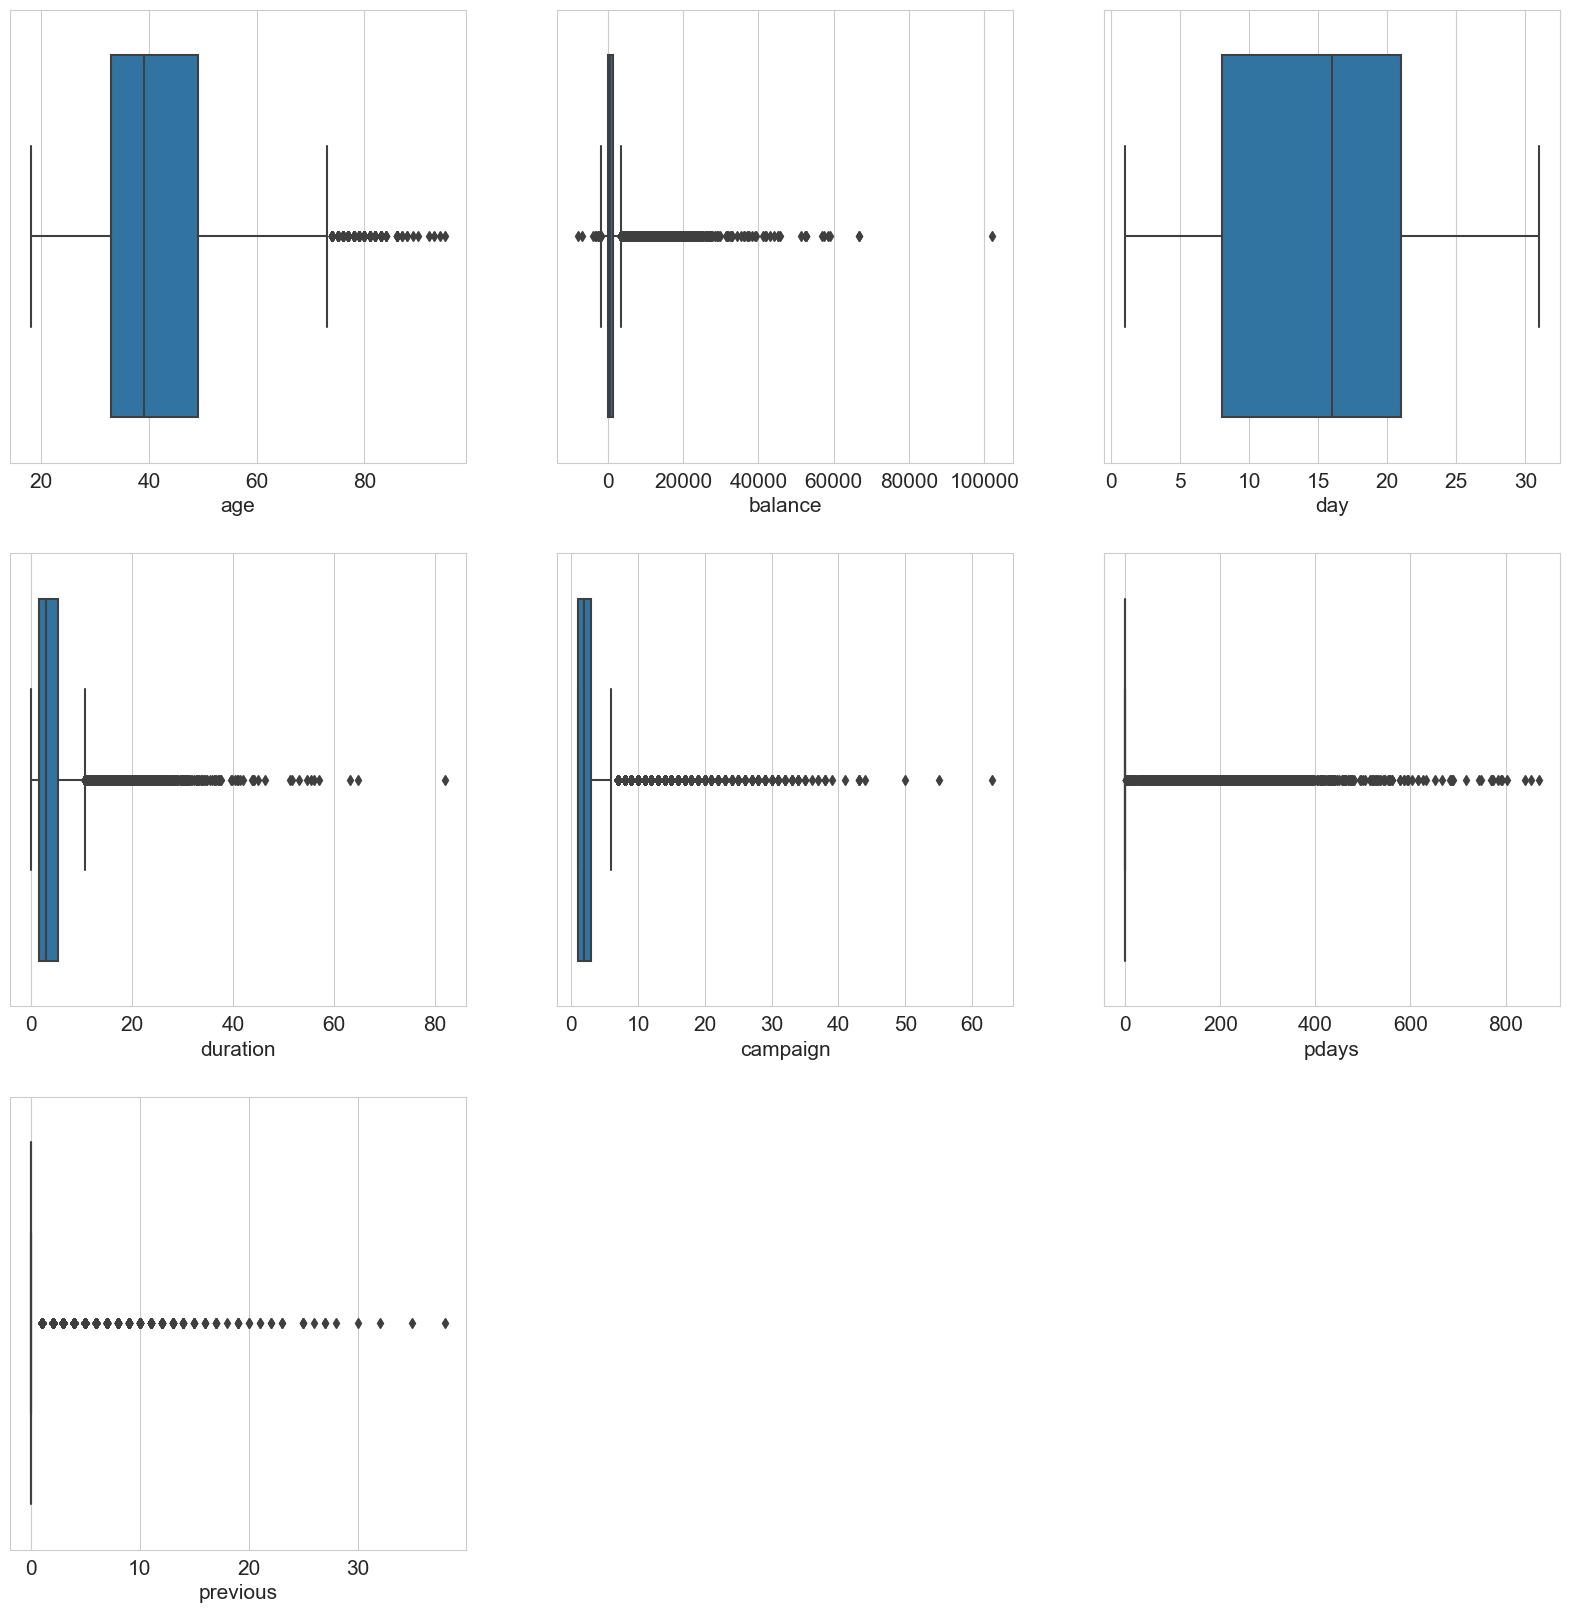

In [67]:
plt.figure(figsize=(20,20))
for i in enumerate(numerical_cols.columns):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(numerical_cols[i[1]])

As we can see, all of our number columns, with the exception of the day column, contain outliers.

### ZScore Method

In [68]:
from scipy.stats import zscore
z=np.abs(zscore(numerical_cols))
z

,age,balance,day,duration,campaign,pdays,previous
0,1.416961,0.191181,0.373881,0.832694,0.246720,0.362639,0.283564
1,0.943392,0.450733,0.493822,0.648623,0.246720,0.362639,0.283564
2,1.321048,0.155386,0.253939,0.070781,0.563563,0.362639,0.283564
3,1.511375,0.641519,0.733704,2.364077,0.563563,0.584978,1.713047
4,0.943392,0.412152,1.425238,0.472111,0.563563,0.362639,0.283564
...,...,...,...,...,...,...,...
31642,1.132220,0.451731,0.465708,0.553093,0.246720,0.362639,0.283564
31643,1.133719,0.325344,1.305297,0.698121,0.246720,0.362639,0.283564
31644,0.848977,0.347960,1.065415,0.858324,0.070123,0.362639,0.283564
31645,1.511375,0.376896,0.105884,0.916574,1.337496,3.405532,7.702881


In [69]:
threshold=3
print(np.where(z>3))

(array([   21,    26,    35, ..., 30357, 30357, 30358], dtype=int64), array([4, 1, 5, ..., 5, 6, 3], dtype=int64))


In [70]:
z.iloc[21][4]

9.575416015382748

In [71]:
bank_train1=bank_train[(z<3).all(axis=1)]
print(bank_train.shape)
print(bank_train1.shape)

(30359, 17)
(26639, 17)


In [72]:
# proportion of lost data using the Zscore approach
a=((30359-26639)/30359)*100
a

12.253368029249975

SInce the Data Loss is more than 10% we go for IQR Method

### IQR Method

In [73]:
Q1 = numerical_cols.quantile(0.25)
Q3 = numerical_cols.quantile(0.75)
IQR=Q3-Q1
bank_train2=numerical_cols[~((numerical_cols < (Q1 - 1.5 * IQR)) | (numerical_cols > (Q3 + 1.5 * IQR))).any(axis=1)]
bank_train2.shape

(19823, 7)

In [74]:
# proportion of lost data using the IQR approach
b=((30359-19823)/30359)*100
b

34.70470041832735

Using zscore and IQR, the data loss percentages are 12.25% and 34.7%, respectively. Data loss of no more than 10% is allowed. Let's adjust the threshold value such that data loss doesn't exceed 10%.

In [75]:
threshold=3.3
print(np.where(z>3.3))

(array([   21,    26,    35, ..., 30357, 30357, 30358], dtype=int64), array([4, 1, 5, ..., 5, 6, 3], dtype=int64))


In [76]:
bank_train1=bank_train[(z<3.3).all(axis=1)]
print(bank_train.shape)
print(bank_train1.shape)

(30359, 17)
(27347, 17)


In [77]:
# Zscore method data loss percentage when 3.3 is the threshold value
a=((30359-27347)/30359)*100
a

9.921275404328206

By this method, with threshold 3.3 we got Data loss is less than 10%, 

SO it's accepted for further processing

In [78]:
bank_train=bank_train1
bank_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,4,2,2,0,1933,0,0,2,19,11,0.73,2,-1,0,2,0
1,31,4,2,2,0,3,0,0,1,20,7,1.52,2,-1,0,2,0
2,27,5,2,2,0,891,1,0,1,18,7,4.00,1,-1,0,2,0
3,57,2,3,3,0,3287,0,0,1,22,6,14.45,1,84,3,1,1
4,31,3,2,2,0,119,1,0,1,4,2,6.33,1,-1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31640,43,2,1,2,0,2968,0,0,3,20,6,0.50,4,-1,0,2,0
31641,37,3,1,3,0,1309,0,0,3,6,6,7.37,2,-1,0,2,0
31642,29,2,1,3,0,0,1,0,1,12,5,1.93,2,-1,0,2,0
31643,53,2,3,3,0,380,0,1,1,5,6,7.30,2,-1,0,2,1


### SKEWNESS Treatment

In [79]:
numerical_cols=bank_train[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']]
numerical_cols.skew()

age         0.474825
balance     2.517871
day         0.067330
duration    1.698821
campaign    2.207771
pdays       3.345094
previous    3.947774
dtype: float64

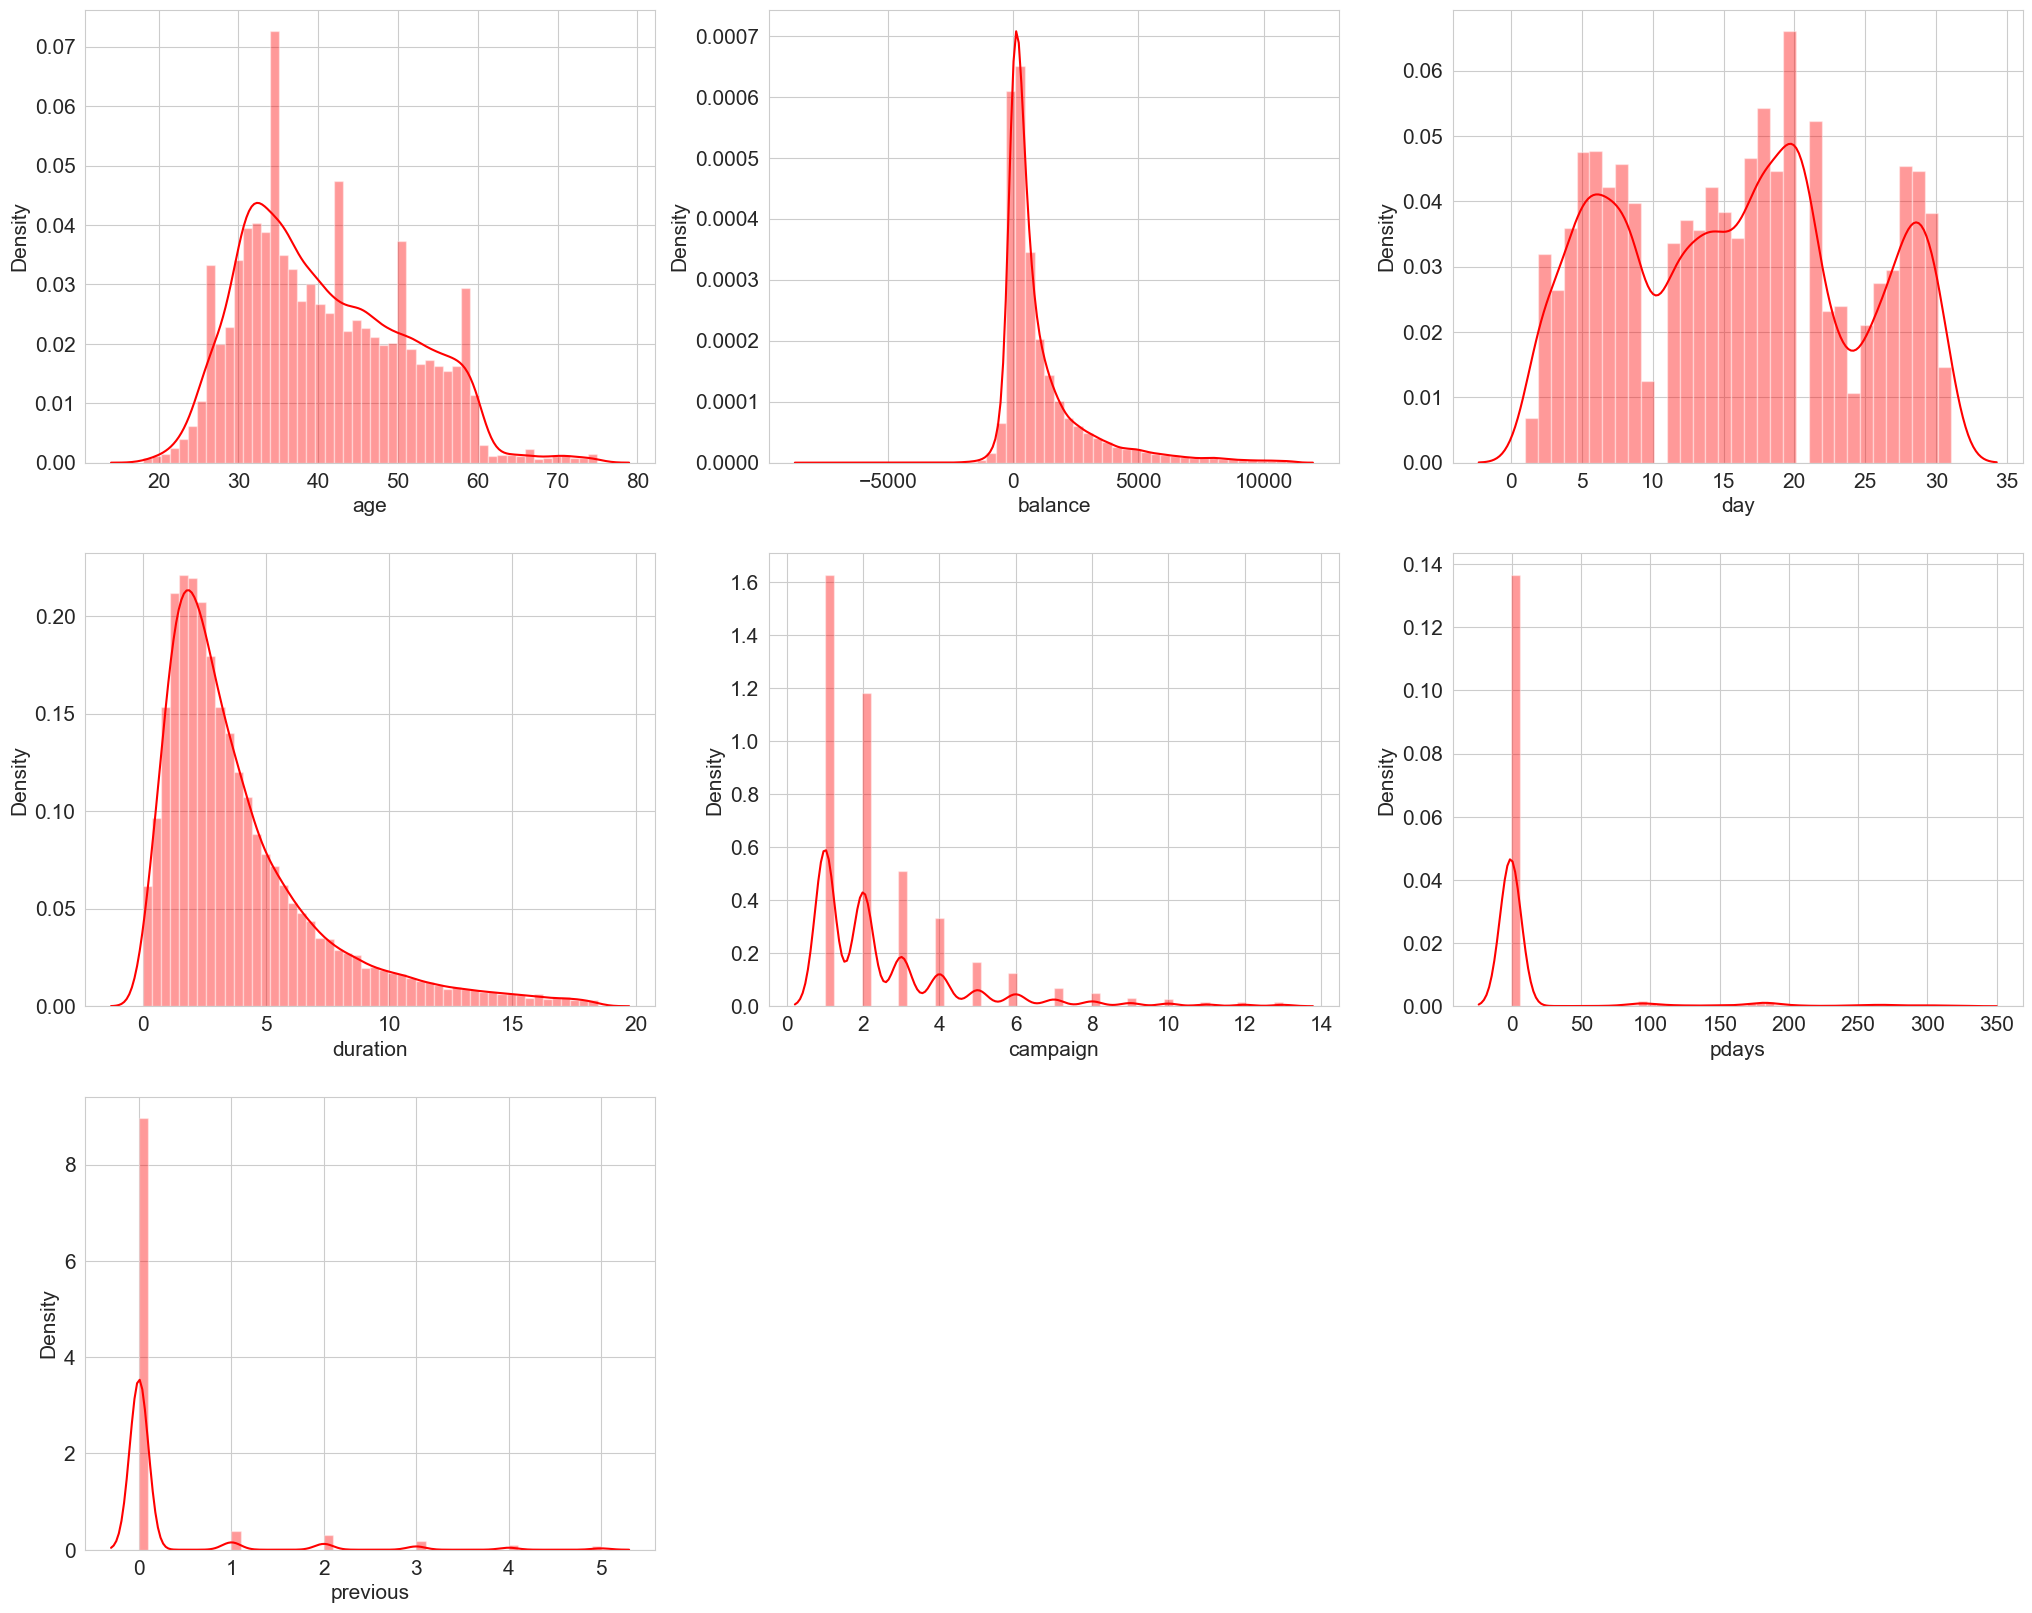

In [80]:
plt.figure(figsize=(25,20))
for i in enumerate(numerical_cols):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(numerical_cols[i[1]],color='r')

As is evident, there is some skewness in

    1.  balance
    2. duration
    3. campaign
    4. pdays
    5. previous

In [81]:
import scipy.stats as stats
from scipy.stats import zscore

In [82]:
 # using power transform method
from sklearn.preprocessing import power_transform
#bank_train[['balance','duration','campaign','pdays','previous']]=power_transform(bank_train[['balance','duration','campaign','pdays','previous']],method='yeo-johnson')
bank_train['balance']=np.cbrt(bank_train['balance'])
bank_train['duration']=np.cbrt(bank_train['duration'])
bank_train['campaign']=np.cbrt(bank_train['campaign'])
bank_train['pdays']=np.cbrt(bank_train['pdays'])
bank_train['previous']=np.cbrt(bank_train['previous'])

In [83]:
numerical_cols=bank_train[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']]
numerical_cols.skew()

age         0.474825
balance    -0.406151
day         0.067330
duration    0.360262
campaign    1.051883
pdays       2.685275
previous    2.781192
dtype: float64

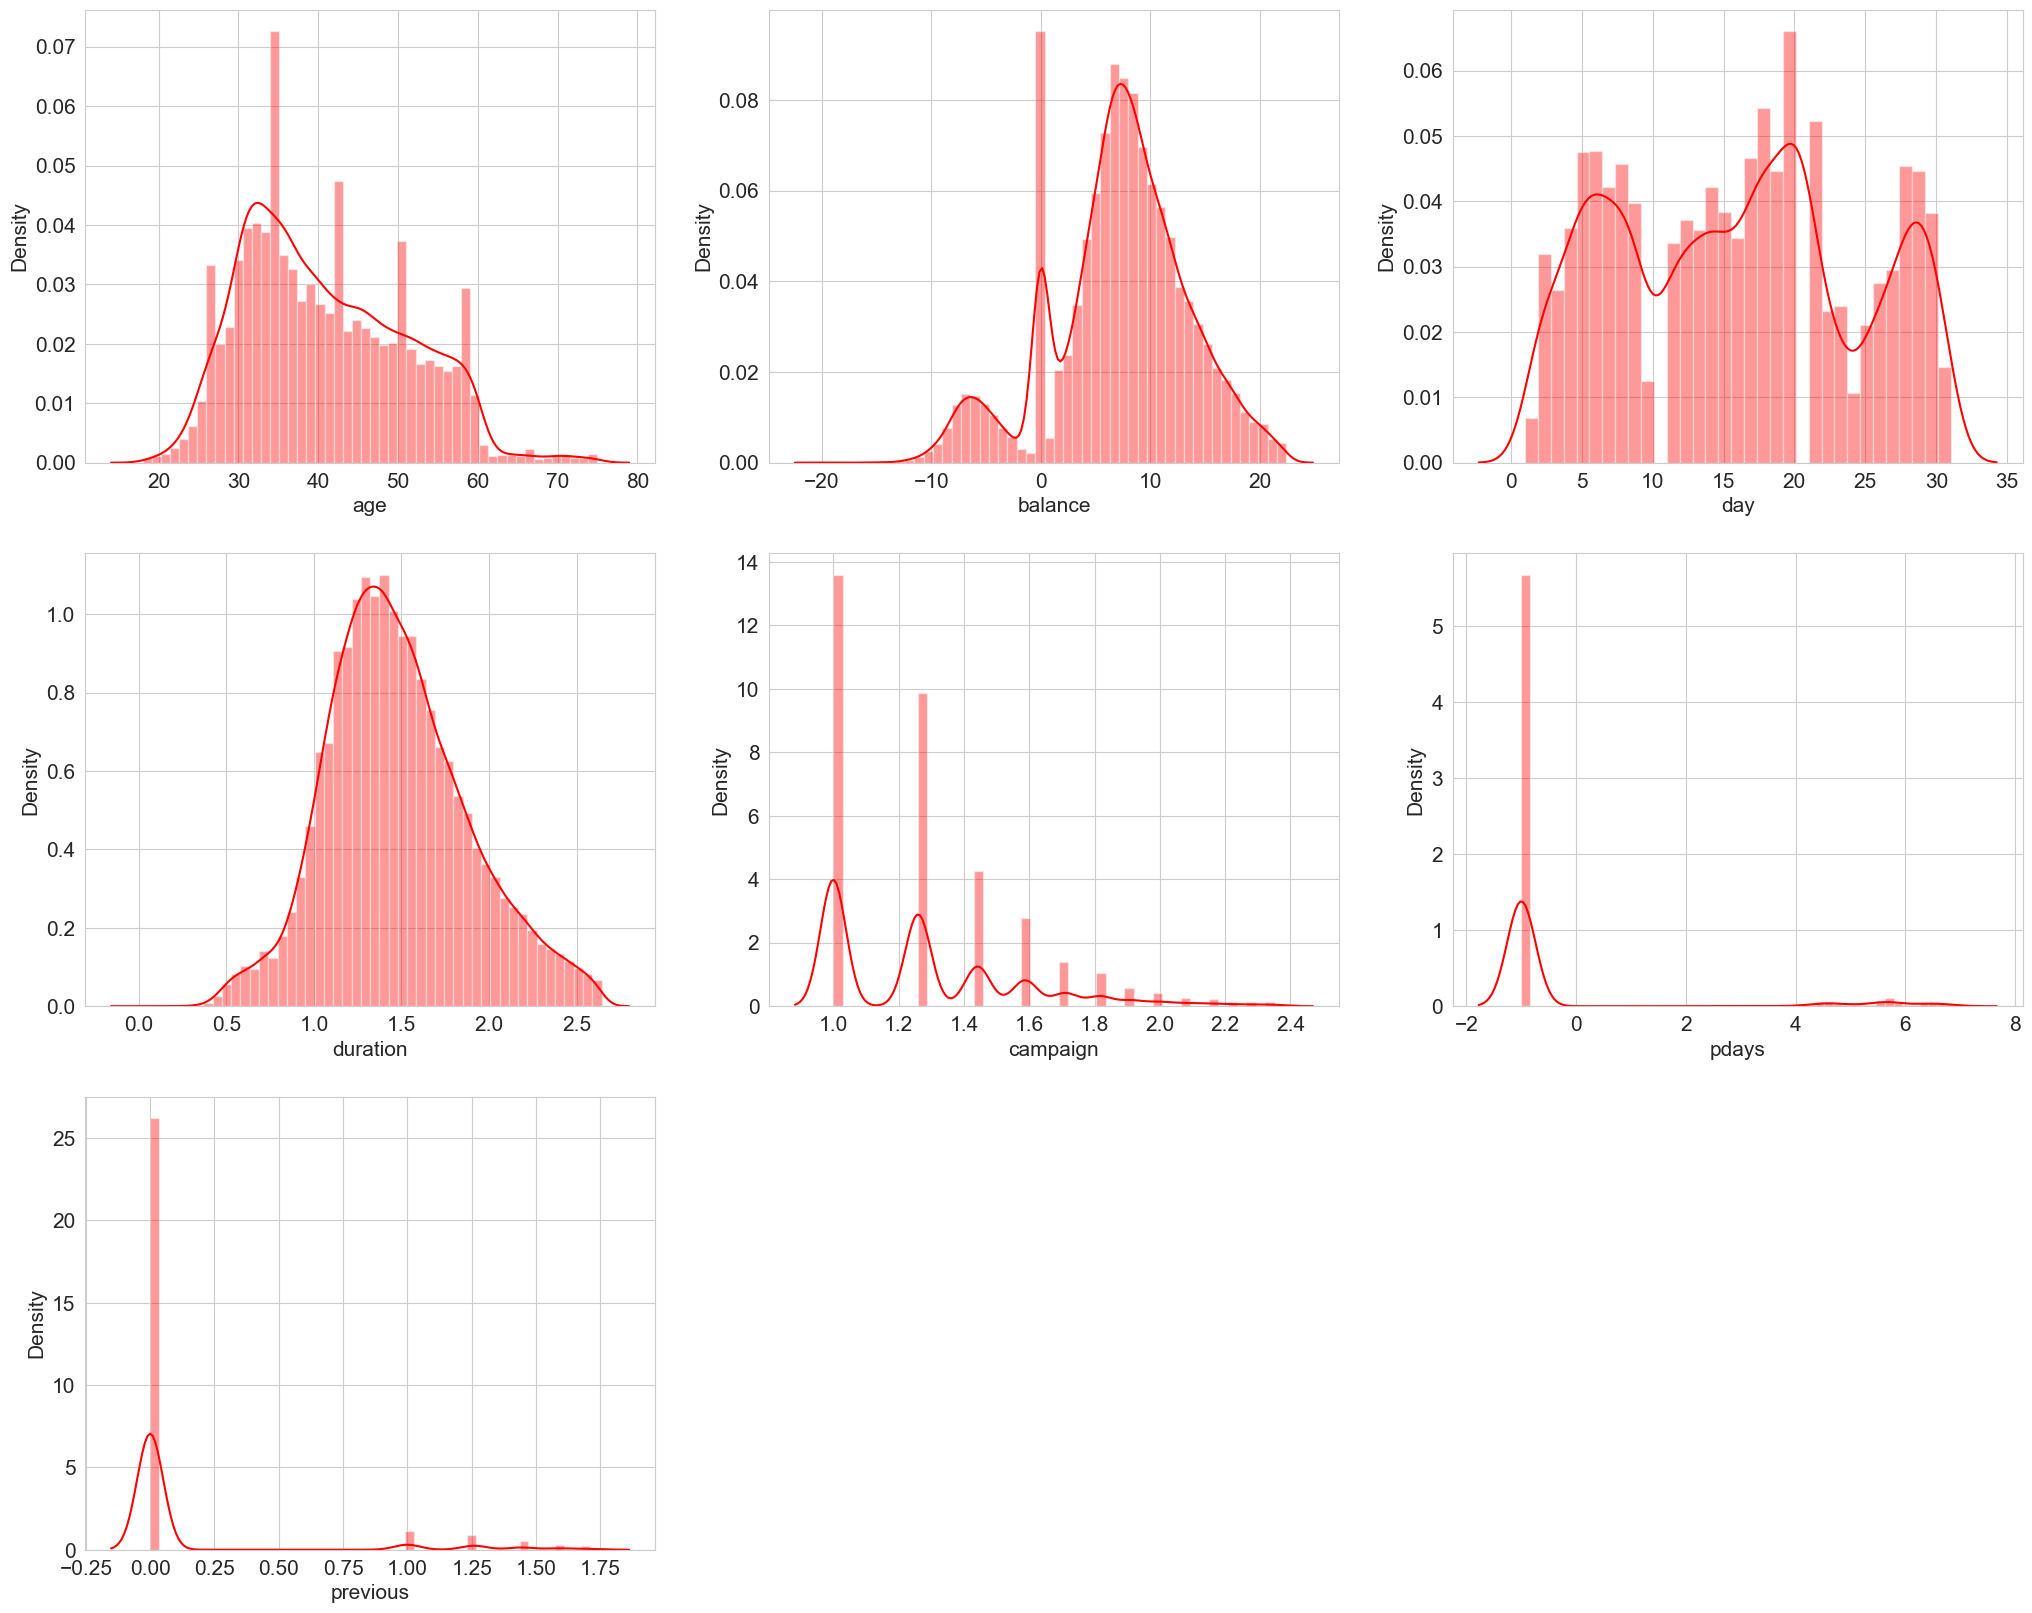

In [84]:
plt.figure(figsize=(25,20))
for i in enumerate(numerical_cols):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(numerical_cols[i[1]],color='r')

We have removed skewness from the numerical columns

## CORRELATION

In [85]:
bank_traincor=bank_train.corr()
bank_traincor

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
age,1.000000,0.055268,0.408421,-0.146992,-0.010709,0.084678,-0.163251,0.000197,0.024509,-0.009620,0.095655,-0.029633,0.037819,0.010441,0.012420,-0.009111,0.001008
job,0.055268,1.000000,-0.026971,-0.013545,0.006789,0.030078,-0.153109,-0.030139,-0.052319,-0.009895,0.006109,-0.002167,-0.024554,0.025112,0.028304,-0.020957,0.056430
marital,0.408421,-0.026971,1.000000,-0.116790,0.010546,-0.034393,0.024715,0.043404,0.039901,0.007786,0.054666,-0.019379,0.032712,-0.012475,-0.014419,0.010262,-0.056089
education,-0.146992,-0.013545,-0.116790,1.000000,-0.008108,0.062106,-0.086488,-0.028802,-0.160825,0.018578,0.068986,0.003220,-0.008255,0.056201,0.062631,-0.052458,0.076661
default,-0.010709,0.006789,0.010546,-0.008108,1.000000,-0.210226,-0.013725,0.081763,0.011655,0.008143,0.016260,-0.002859,0.014178,-0.036707,-0.037952,0.035305,-0.015949
balance,0.084678,0.030078,-0.034393,0.062106,-0.210226,1.000000,-0.074955,-0.140559,-0.053381,-0.014346,0.060881,0.025699,-0.025506,0.087129,0.091013,-0.083578,0.094566
housing,-0.163251,-0.153109,0.024715,-0.086488,-0.013725,-0.074955,1.000000,0.032803,0.226378,-0.015472,-0.166937,0.016078,-0.047478,0.013991,-0.001533,-0.027424,-0.141281
loan,0.000197,-0.030139,0.043404,-0.028802,0.081763,-0.140559,0.032803,1.000000,-0.014205,0.013502,0.032104,-0.005654,0.000632,-0.011068,-0.016700,0.003045,-0.070146
contact,0.024509,-0.052319,0.039901,-0.160825,0.011655,-0.053381,0.226378,-0.014205,1.000000,-0.035814,-0.205106,-0.033372,-0.004060,-0.231328,-0.228871,0.224983,-0.157820
day,-0.009620,-0.009895,0.007786,0.018578,0.008143,-0.014346,-0.015472,0.013502,-0.035814,1.000000,0.094689,-0.043439,0.144184,-0.043417,-0.042512,0.040063,-0.029617


<Axes: >

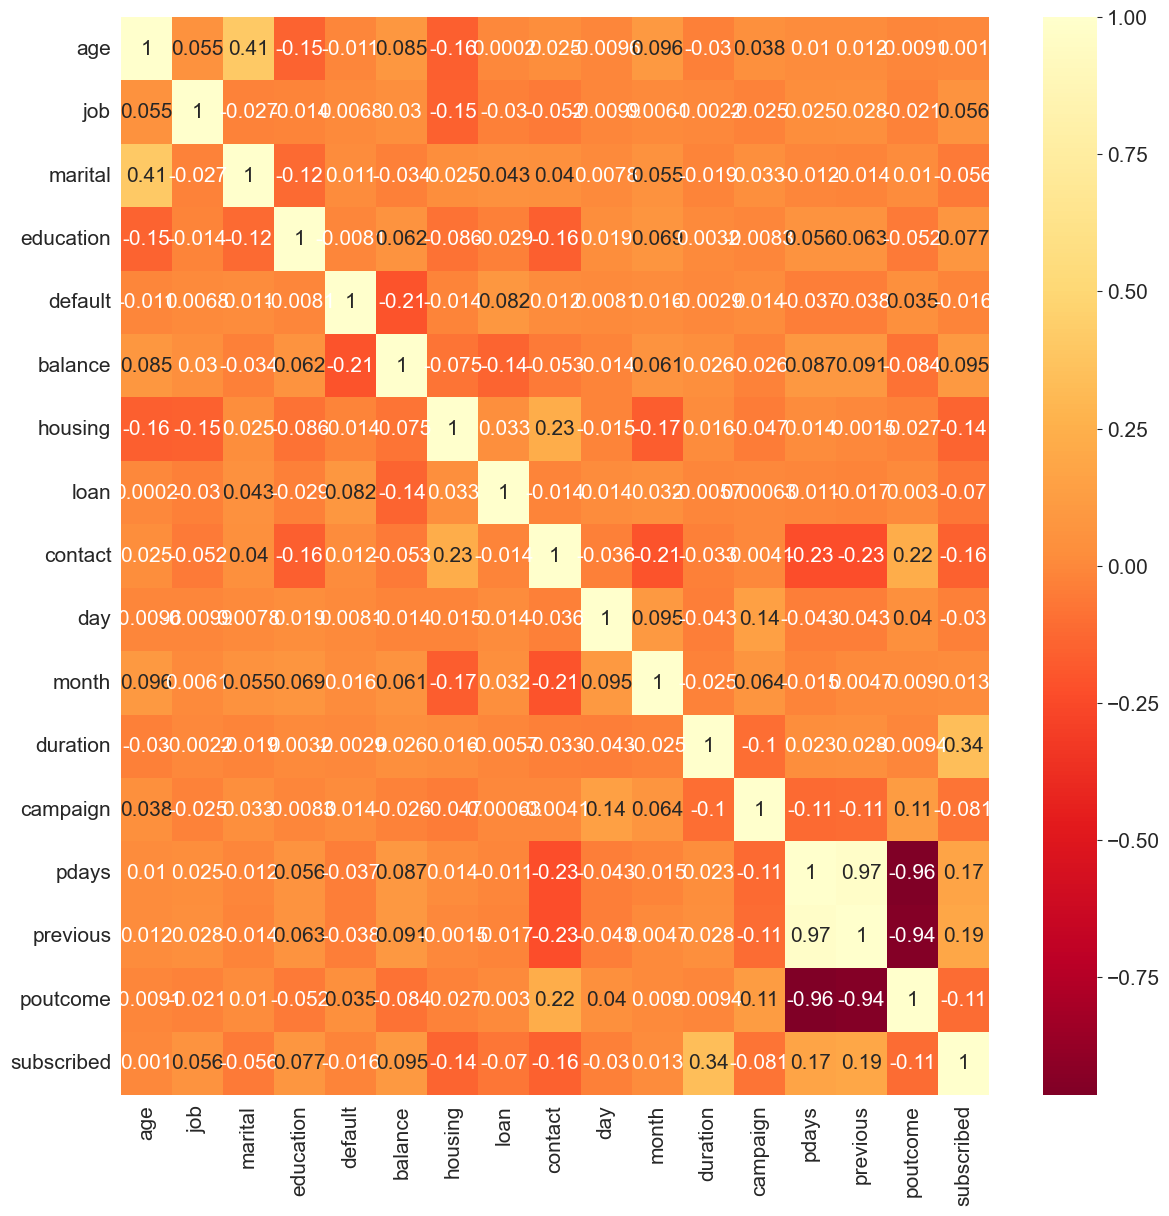

In [86]:
plt.figure(figsize=(14,14))
sns.heatmap(bank_traincor,cmap='YlOrRd_r',annot=True)

Observations:

    1. Previous days and present days have a perfect correlation. Additionally, they have the same relationship to the target variable. Any one of them can be eliminated.
    2. Poutcomace has a very poor correlation with previous columns and pdays.

## Checking for Multicollinearity

In [87]:
#Splitting the data
x= bank_train.drop(['subscribed'], axis=1)

In [88]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["faetures"]=x.columns
    print(vif)

In [89]:
vif_calc()

    VIF Factor   faetures
0    20.933430        age
1     3.022484        job
2    12.405430    marital
3    11.357560  education
4     1.072318    default
5     2.521785    balance
6     2.454455    housing
7     1.231864       loan
8     5.081071    contact
9     4.719398        day
10    8.322496      month
11   13.778478   duration
12   18.565229   campaign
13   23.597330      pdays
14   18.508756   previous
15   68.372065   poutcome


The pdays and prior have high VIF values, as can be seen. Pdays can be taken out of the train dataset. However, before doing so, let's look at the test data correlation as well.

In [90]:
bank_testcor=bank_test.corr()
bank_testcor

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
age,1.000000,0.064742,0.394766,-0.169478,-0.023803,0.082334,-0.192481,-0.027111,0.020093,-0.007350,0.079848,-0.008731,0.000154,-0.005073,0.010581,-0.007976
job,0.064742,1.000000,-0.015399,-0.027858,-0.011918,0.007667,-0.161968,-0.016008,-0.043646,-0.006375,0.015581,0.017830,-0.036030,-0.028636,-0.003680,0.014262
marital,0.394766,-0.015399,1.000000,-0.118162,0.000798,-0.001360,0.010061,0.055440,0.035394,-0.000399,0.049536,-0.011221,0.006589,-0.006950,-0.015493,0.004554
education,-0.169478,-0.027858,-0.118162,1.000000,-0.024713,0.065430,-0.064225,-0.025660,-0.154603,0.037034,0.075196,-0.008185,0.008354,0.010167,0.043401,-0.033436
default,-0.023803,-0.011918,0.000798,-0.024713,1.000000,-0.061198,0.008673,0.068280,0.016576,0.007617,0.015934,-0.007446,0.011919,-0.026645,-0.020802,0.030851
balance,0.082334,0.007667,-0.001360,0.065430,-0.061198,1.000000,-0.068755,-0.085370,-0.034638,0.003099,0.091387,0.013090,-0.018874,0.009845,0.025307,-0.027862
housing,-0.192481,-0.161968,0.010061,-0.064225,0.008673,-0.068755,1.000000,0.050899,0.185243,-0.030616,-0.173634,0.013890,-0.030155,0.117295,0.036890,-0.098004
loan,-0.027111,-0.016008,0.055440,-0.025660,0.068280,-0.085370,0.050899,1.000000,-0.016817,0.002206,0.024395,-0.012124,0.011075,-0.029308,-0.024449,0.029442
contact,0.020093,-0.043646,0.035394,-0.154603,0.016576,-0.034638,0.185243,-0.016817,1.000000,-0.035904,-0.188744,-0.029541,0.009029,-0.229494,-0.162214,0.258796
day,-0.007350,-0.006375,-0.000399,0.037034,0.007617,0.003099,-0.030616,0.002206,-0.035904,1.000000,0.106630,-0.027750,0.176499,-0.096085,-0.053143,0.090587


<Axes: >

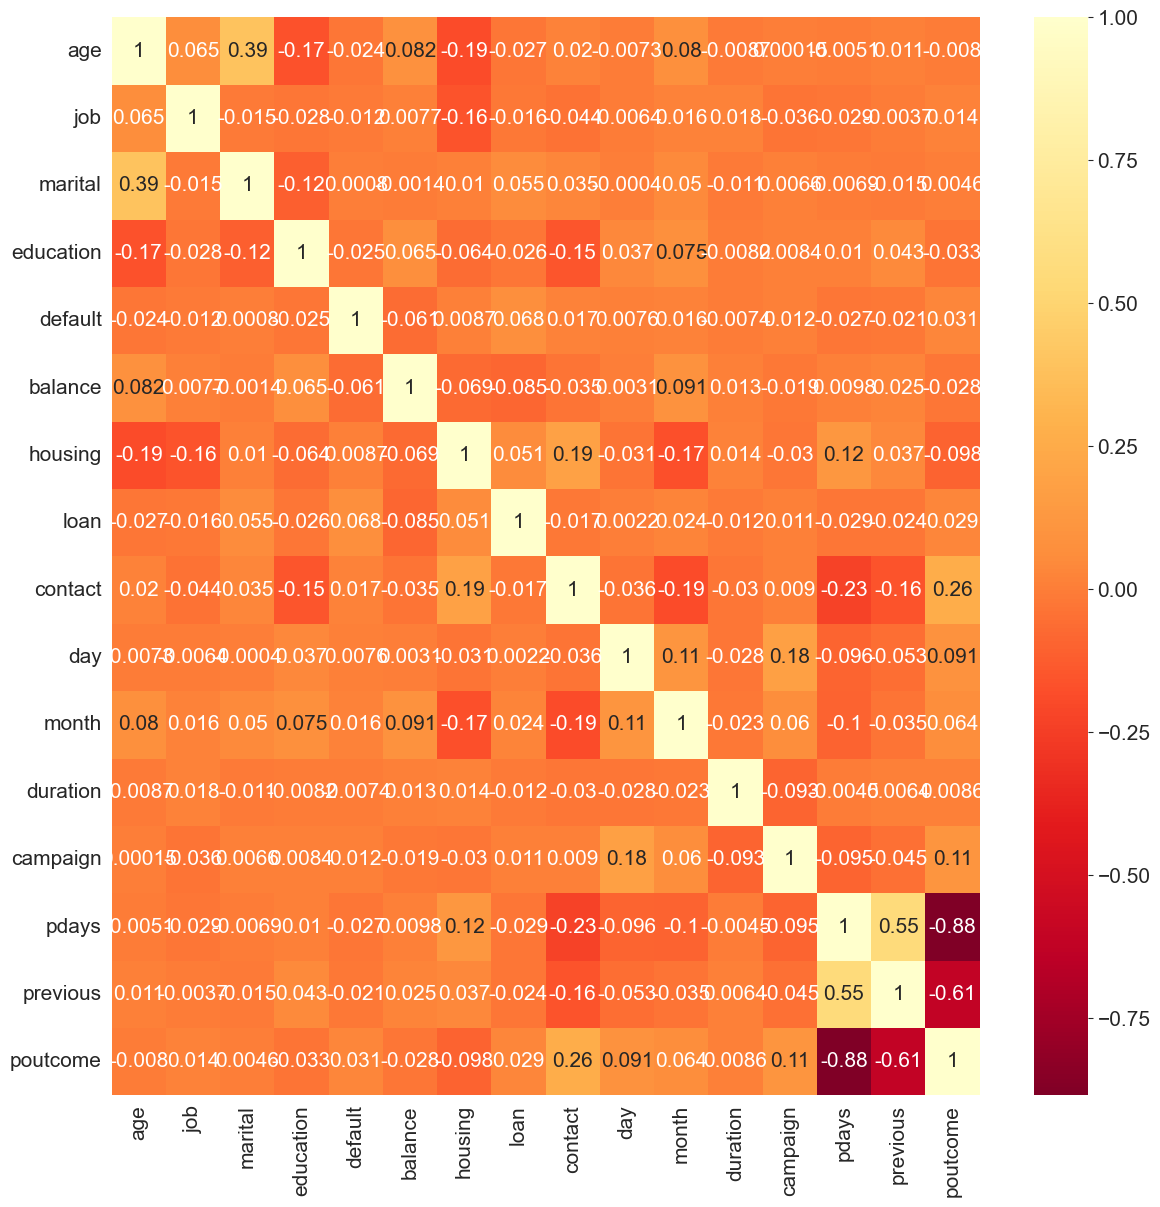

In [91]:
plt.figure(figsize=(14,14))
sns.heatmap(bank_testcor,cmap='YlOrRd_r',annot=True)

The pdays and prior have a moderate association, as we can see above. Pdays can be taken out of the train and test datasets.

In [92]:
bank_train.drop('pdays',axis=1,inplace=True)

In [93]:
bank_test.drop('pdays',axis=1,inplace=True)

In [94]:
bank_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,subscribed
0,56,4,2,2,0,12.456918,0,0,2,19,11,0.900411,1.259921,0.00000,2,0
1,31,4,2,2,0,1.442250,0,0,1,20,7,1.149779,1.259921,0.00000,2,0
2,27,5,2,2,0,9.622603,1,0,1,18,7,1.587401,1.000000,0.00000,2,0
3,57,2,3,3,0,14.868480,0,0,1,22,6,2.435693,1.000000,1.44225,1,1
4,31,3,2,2,0,4.918685,1,0,1,4,2,1.849842,1.000000,0.00000,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31640,43,2,1,2,0,14.371032,0,0,3,20,6,0.793701,1.587401,0.00000,2,0
31641,37,3,1,3,0,10.939057,0,0,3,6,6,1.946058,1.259921,0.00000,2,0
31642,29,2,1,3,0,0.000000,1,0,1,12,5,1.245047,1.259921,0.00000,2,0
31643,53,2,3,3,0,7.243156,0,1,1,5,6,1.939877,1.259921,0.00000,2,1


In [95]:
bank_test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome
0,32,5,2,2,0,118,1,0,1,15,5,0.33,6,0,2
1,78,6,3,1,0,2787,0,0,2,1,7,6.20,1,0,2
2,31,7,1,3,0,144,1,0,3,16,5,11.27,1,0,2
3,57,5,1,1,0,3777,1,0,2,13,5,1.08,2,0,2
4,45,1,3,2,0,-705,0,1,3,3,7,1.85,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,2,2,3,0,45,0,0,1,28,8,2.47,4,0,2
13560,54,1,2,1,0,2281,1,0,3,20,6,2.63,1,0,2
13561,35,6,2,1,0,285,1,0,1,29,1,2.27,1,0,2
13562,29,4,1,2,0,464,0,0,1,9,11,3.47,2,3,1


In [96]:
bank_train.reset_index(drop=True,inplace=True)
bank_test.reset_index(drop=True,inplace=True)

0    24580
1     2767
Name: subscribed, dtype: int64


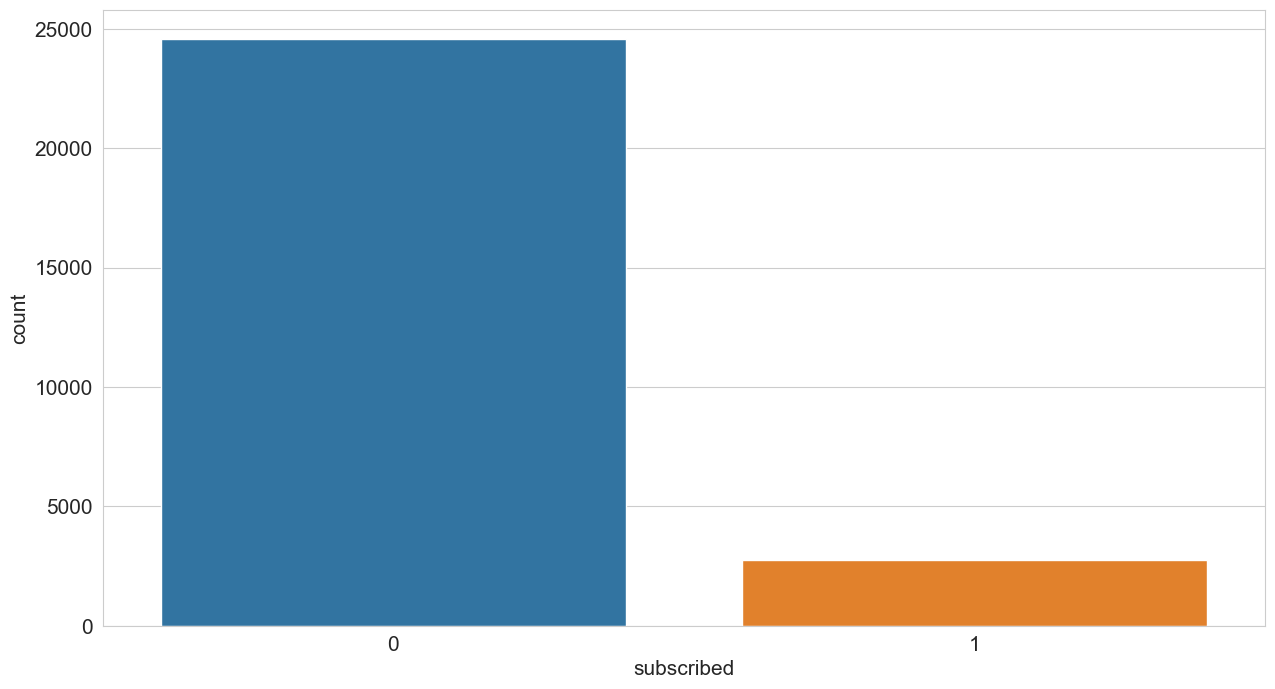

In [97]:
sns.countplot(bank_train['subscribed'])
print(bank_train.subscribed.value_counts())

## Feature Scaling using MinMax Scaler

In [98]:
#Splitting the data
x= bank_train.drop(['subscribed'], axis=1)
y= bank_train['subscribed']

In [99]:
from sklearn.preprocessing import MinMaxScaler
st=MinMaxScaler()
x=pd.DataFrame(st.fit_transform(x))
x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.666667,0.3,0.5,0.5,0.0,0.765119,0.0,0.0,0.5,0.600000,0.909091,0.340755,0.192344,0.000000,1.0
1,0.228070,0.3,0.5,0.5,0.0,0.505593,0.0,0.0,0.0,0.633333,0.545455,0.435127,0.192344,0.000000,1.0
2,0.157895,0.4,0.5,0.5,0.0,0.698337,1.0,0.0,0.0,0.566667,0.545455,0.600742,0.000000,0.000000,1.0
3,0.684211,0.1,1.0,1.0,0.0,0.821940,0.0,0.0,0.0,0.700000,0.454545,0.921773,0.000000,0.843433,0.5
4,0.228070,0.2,0.5,0.5,0.0,0.587504,1.0,0.0,0.0,0.100000,0.090909,0.700061,0.000000,0.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27342,0.438596,0.1,0.0,0.5,0.0,0.810219,0.0,0.0,1.0,0.633333,0.454545,0.300371,0.434682,0.000000,1.0
27343,0.333333,0.2,0.0,1.0,0.0,0.729355,0.0,0.0,1.0,0.166667,0.454545,0.736473,0.192344,0.000000,1.0
27344,0.192982,0.1,0.0,1.0,0.0,0.471611,1.0,0.0,0.0,0.366667,0.363636,0.471180,0.192344,0.000000,1.0
27345,0.614035,0.1,1.0,1.0,0.0,0.642273,0.0,1.0,0.0,0.133333,0.454545,0.734134,0.192344,0.000000,1.0


In [100]:
x.columns=['age','job','marital','education','default','balance','housing','loan','contact','day','month','duration','campaign','previous','']
x.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,
0,0.666667,0.3,0.5,0.5,0.0,0.765119,0.0,0.0,0.5,0.600000,0.909091,0.340755,0.192344,0.000000,1.0
1,0.228070,0.3,0.5,0.5,0.0,0.505593,0.0,0.0,0.0,0.633333,0.545455,0.435127,0.192344,0.000000,1.0
2,0.157895,0.4,0.5,0.5,0.0,0.698337,1.0,0.0,0.0,0.566667,0.545455,0.600742,0.000000,0.000000,1.0
3,0.684211,0.1,1.0,1.0,0.0,0.821940,0.0,0.0,0.0,0.700000,0.454545,0.921773,0.000000,0.843433,0.5
4,0.228070,0.2,0.5,0.5,0.0,0.587504,1.0,0.0,0.0,0.100000,0.090909,0.700061,0.000000,0.000000,1.0


In [101]:
print(y.value_counts())

0    24580
1     2767
Name: subscribed, dtype: int64


# Resampling using SMOTE

In [102]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
x,y=smt.fit_resample(x,y)

In [103]:
y.value_counts()

0    24580
1    24580
Name: subscribed, dtype: int64

Now we can observe that the data is balanced

## MODELLING

Let's find the best random state

In [104]:
#importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [105]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    RF = RandomForestClassifier()
    RF.fit(x_train,y_train)
    pred=RF.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Best Accuracy is ",maxAccu," At random state ",maxRS)

Best Accuracy is  0.9612489829129374  At random state  169


## Splitting Train and Test Data

In [106]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=maxRS)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(39328, 15)
(9832, 15)
(39328,)
(9832,)


## Finding The Best Model

In [107]:
# Importing necessary Libraries

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

### 1. Gaussian Naive Base

In [108]:
GNB=GaussianNB()
GNB.fit(x_train,y_train)
predGNB=GNB.predict(x_test)
print(accuracy_score(y_test,predGNB))
print(confusion_matrix(y_test,predGNB))
print(classification_report(y_test,predGNB))
print("Accuracy of the Training Data::",GNB.score(x_train,y_train))
print("Accuracy of the Test Data::",GNB.score(x_test,y_test))

0.7740032546786005
[[3769 1174]
 [1048 3841]]
              precision    recall  f1-score   support

           0       0.78      0.76      0.77      4943
           1       0.77      0.79      0.78      4889

    accuracy                           0.77      9832
   macro avg       0.77      0.77      0.77      9832
weighted avg       0.77      0.77      0.77      9832

Accuracy of the Training Data:: 0.7673159072416599
Accuracy of the Test Data:: 0.7740032546786005


### 2. Decision Tree Classifier

In [109]:
print('Decision Tree Classifier for Criterion Gini')
DTC1=DecisionTreeClassifier(criterion='gini')
DTC1.fit(x_train,y_train)
predDTC1=DTC1.predict(x_test)
print(accuracy_score(y_test,predDTC1))
print(confusion_matrix(y_test,predDTC1))
print(classification_report(y_test,predDTC1))
print("Accuracy of the Training Data::",DTC1.score(x_train,y_train))
print("Accuracy of the Test Data::",DTC1.score(x_test,y_test))
print('\n')

print('Decision Tree Classifier for Criterion Entropy')
DTC2=DecisionTreeClassifier(criterion='entropy')
DTC2.fit(x_train,y_train)
predDTC2=DTC2.predict(x_test)
print(accuracy_score(y_test,predDTC2))
print(confusion_matrix(y_test,predDTC2))
print(classification_report(y_test,predDTC2))
print("Accuracy of the Training Data::",DTC2.score(x_train,y_train))
print("Accuracy of the Test Data::",DTC2.score(x_test,y_test))

Decision Tree Classifier for Criterion Gini
0.9189381611065908
[[4508  435]
 [ 362 4527]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      4943
           1       0.91      0.93      0.92      4889

    accuracy                           0.92      9832
   macro avg       0.92      0.92      0.92      9832
weighted avg       0.92      0.92      0.92      9832

Accuracy of the Training Data:: 1.0
Accuracy of the Test Data:: 0.9189381611065908


Decision Tree Classifier for Criterion Entropy
0.9211757526444264
[[4532  411]
 [ 364 4525]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      4943
           1       0.92      0.93      0.92      4889

    accuracy                           0.92      9832
   macro avg       0.92      0.92      0.92      9832
weighted avg       0.92      0.92      0.92      9832

Accuracy of the Training Data:: 1.0
Accuracy of the Test Data:: 0.921175752644

With the Entropy criterion, DTC functions better.

In [110]:
DTC=DecisionTreeClassifier(criterion='entropy')
DTC.fit(x_train,y_train)
predDTC=DTC.predict(x_test)
print(accuracy_score(y_test,predDTC))
print(confusion_matrix(y_test,predDTC))
print(classification_report(y_test,predDTC))
print("Accuracy of the Training Data::",DTC.score(x_train,y_train))
print("Accuracy of the Test Data::",DTC.score(x_test,y_test))

0.92259967453214
[[4527  416]
 [ 345 4544]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      4943
           1       0.92      0.93      0.92      4889

    accuracy                           0.92      9832
   macro avg       0.92      0.92      0.92      9832
weighted avg       0.92      0.92      0.92      9832

Accuracy of the Training Data:: 1.0
Accuracy of the Test Data:: 0.92259967453214


### 3. KNeighbors Classifier

In [111]:
KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)
predKNN=KNN.predict(x_test)
print(accuracy_score(y_test,predKNN))
print(confusion_matrix(y_test,predKNN))
print(classification_report(y_test,predKNN))
print("Accuracy of the Training Data::",KNN.score(x_train,y_train))
print("Accuracy of the Test Data::",KNN.score(x_test,y_test))

0.9237184703010578
[[4212  731]
 [  19 4870]]
              precision    recall  f1-score   support

           0       1.00      0.85      0.92      4943
           1       0.87      1.00      0.93      4889

    accuracy                           0.92      9832
   macro avg       0.93      0.92      0.92      9832
weighted avg       0.93      0.92      0.92      9832

Accuracy of the Training Data:: 0.9371440195280716
Accuracy of the Test Data:: 0.9237184703010578


### 4. Support Vector Classifier

In [112]:
print('Support Vector Classifier for the kernel rbf')
SV1=SVC(kernel='rbf')
SV1.fit(x_train,y_train)
predSV1=SV1.predict(x_test)
print(accuracy_score(y_test,predSV1))
print(confusion_matrix(y_test,predSV1))
print(classification_report(y_test,predSV1))
print("Accuracy of the Training Data::",SV1.score(x_train,y_train))
print("Accuracy of the Test Data::",SV1.score(x_test,y_test))
print('\n')

print('Support Vector Classifier for the kernel poly')
SV2=SVC(kernel='poly')
SV2.fit(x_train,y_train)
predSV2=SV2.predict(x_test)
print(accuracy_score(y_test,predSV2))
print(confusion_matrix(y_test,predSV2))
print(classification_report(y_test,predSV2))
print("Accuracy of the Training Data::",SV2.score(x_train,y_train))
print("Accuracy of the Test Data::",SV2.score(x_test,y_test))
print('\n')

print('Support Vector Classifier for the kernel linear')
SV3=SVC(kernel='linear')
SV3.fit(x_train,y_train)
predSV3=SV3.predict(x_test)
print(accuracy_score(y_test,predSV3))
print(confusion_matrix(y_test,predSV3))
print(classification_report(y_test,predSV3))
print("Accuracy of the Training Data::",SV3.score(x_train,y_train))
print("Accuracy of the Test Data::",SV3.score(x_test,y_test))

Support Vector Classifier for the kernel rbf
0.8729658258746948
[[4059  884]
 [ 365 4524]]
              precision    recall  f1-score   support

           0       0.92      0.82      0.87      4943
           1       0.84      0.93      0.88      4889

    accuracy                           0.87      9832
   macro avg       0.88      0.87      0.87      9832
weighted avg       0.88      0.87      0.87      9832

Accuracy of the Training Data:: 0.8721013018714402
Accuracy of the Test Data:: 0.8729658258746948


Support Vector Classifier for the kernel poly
0.8667615947925142
[[4045  898]
 [ 412 4477]]
              precision    recall  f1-score   support

           0       0.91      0.82      0.86      4943
           1       0.83      0.92      0.87      4889

    accuracy                           0.87      9832
   macro avg       0.87      0.87      0.87      9832
weighted avg       0.87      0.87      0.87      9832

Accuracy of the Training Data:: 0.8655665174938975
Accuracy of 

Let's choose rbf since it performs better for SVC than poly.

In [113]:
SV=SVC(kernel='rbf')
SV.fit(x_train,y_train)
predSV=SV.predict(x_test)
print(accuracy_score(y_test,predSV))
print(confusion_matrix(y_test,predSV))
print(classification_report(y_test,predSV))
print("Accuracy of the Training Data::",SV.score(x_train,y_train))
print("Accuracy of the Test Data::",SV.score(x_test,y_test))

0.8729658258746948
[[4059  884]
 [ 365 4524]]
              precision    recall  f1-score   support

           0       0.92      0.82      0.87      4943
           1       0.84      0.93      0.88      4889

    accuracy                           0.87      9832
   macro avg       0.88      0.87      0.87      9832
weighted avg       0.88      0.87      0.87      9832

Accuracy of the Training Data:: 0.8721013018714402
Accuracy of the Test Data:: 0.8729658258746948


### 5. Random Forest Classifier

In [114]:
RF = RandomForestClassifier()
RF.fit(x_train,y_train)
predRF=RF.predict(x_test)
print(accuracy_score(y_test,predRF))
print(confusion_matrix(y_test,predRF))
print(classification_report(y_test,predRF))
print("Accuracy of the Training Data::",RF.score(x_train,y_train))
print("Accuracy of the Test Data::",RF.score(x_test,y_test))

0.9598250610252238
[[4658  285]
 [ 110 4779]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      4943
           1       0.94      0.98      0.96      4889

    accuracy                           0.96      9832
   macro avg       0.96      0.96      0.96      9832
weighted avg       0.96      0.96      0.96      9832

Accuracy of the Training Data:: 1.0
Accuracy of the Test Data:: 0.9598250610252238


### 6. Ada Boost Classifier

In [115]:
ABC = AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC=ABC.predict(x_test)
print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))
print("Accuracy of the Training Data::",ABC.score(x_train,y_train))
print("Accuracy of the Test Data::",ABC.score(x_test,y_test))

0.8905614320585842
[[4383  560]
 [ 516 4373]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      4943
           1       0.89      0.89      0.89      4889

    accuracy                           0.89      9832
   macro avg       0.89      0.89      0.89      9832
weighted avg       0.89      0.89      0.89      9832

Accuracy of the Training Data:: 0.8860608218063466
Accuracy of the Test Data:: 0.8905614320585842


### 7. Bagging Classifier

In [116]:
BC = BaggingClassifier()
BC.fit(x_train,y_train)
predBC=BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))
print("Accuracy of the Training Data::",BC.score(x_train,y_train))
print("Accuracy of the Test Data::",BC.score(x_test,y_test))

0.9425345809601302
[[4619  324]
 [ 241 4648]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      4943
           1       0.93      0.95      0.94      4889

    accuracy                           0.94      9832
   macro avg       0.94      0.94      0.94      9832
weighted avg       0.94      0.94      0.94      9832

Accuracy of the Training Data:: 0.9967707485760781
Accuracy of the Test Data:: 0.9425345809601302


### 8. Gradient Boosting Classifier

In [117]:
GBC = GradientBoostingClassifier()
GBC.fit(x_train,y_train)
predGBC=GBC.predict(x_test)
print(accuracy_score(y_test,predGBC))
print(confusion_matrix(y_test,predGBC))
print(classification_report(y_test,predGBC))
print("Accuracy of the Training Data::",GBC.score(x_train,y_train))
print("Accuracy of the Test Data::",GBC.score(x_test,y_test))

0.919853539462978
[[4433  510]
 [ 278 4611]]
              precision    recall  f1-score   support

           0       0.94      0.90      0.92      4943
           1       0.90      0.94      0.92      4889

    accuracy                           0.92      9832
   macro avg       0.92      0.92      0.92      9832
weighted avg       0.92      0.92      0.92      9832

Accuracy of the Training Data:: 0.9187855980471928
Accuracy of the Test Data:: 0.919853539462978


### 9. Extra Trees Classifier

In [118]:
ET = ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))
print("Accuracy of the Training Data::",ET.score(x_train,y_train))
print("Accuracy of the Test Data::",ET.score(x_test,y_test))

0.9691822620016274
[[4678  265]
 [  38 4851]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      4943
           1       0.95      0.99      0.97      4889

    accuracy                           0.97      9832
   macro avg       0.97      0.97      0.97      9832
weighted avg       0.97      0.97      0.97      9832

Accuracy of the Training Data:: 1.0
Accuracy of the Test Data:: 0.9691822620016274


### 10. Logistic Regression

In [119]:
LG=LogisticRegression()
LG.fit(x_train,y_train)
predLG=LG.predict(x_test)
print(accuracy_score(y_test,predLG))
print(confusion_matrix(y_test,predLG))
print(classification_report(y_test,predLG))
print("Accuracy of the Training Data::",LG.score(x_train,y_train))
print("Accuracy of the Test Data::",LG.score(x_test,y_test))

0.8287225386493083
[[4031  912]
 [ 772 4117]]
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      4943
           1       0.82      0.84      0.83      4889

    accuracy                           0.83      9832
   macro avg       0.83      0.83      0.83      9832
weighted avg       0.83      0.83      0.83      9832

Accuracy of the Training Data:: 0.8230268510984541
Accuracy of the Test Data:: 0.8287225386493083


For our data, both the Random Forest and Extra Tree Classifiers perform well.

## Cross Validation to avoid overfitting and underfitting

In [120]:
from sklearn.model_selection import cross_val_score
GNB_score=cross_val_score(GNB,x,y,scoring='accuracy')
print("Mean Cross Validation Score of GaussianNB = ",np.mean(GNB_score))

Mean Cross Validation Score of GaussianNB =  0.7696704637917006


In [121]:
DTC_score=cross_val_score(DTC,x,y,scoring='accuracy')
print("Mean Cross Validation Score of Decision Tree Classifier = ",np.mean(DTC_score))

Mean Cross Validation Score of Decision Tree Classifier =  0.9173718470301058


In [122]:
KNN_score=cross_val_score(KNN,x,y,scoring='accuracy')
print("Mean Cross Validation Score of KNeighbor Classifier = ",np.mean(KNN_score))

Mean Cross Validation Score of KNeighbor Classifier =  0.9157241659886086


In [123]:
 from sklearn.model_selection import cross_val_score

In [124]:
SV_score=cross_val_score(SV,x,y,scoring='accuracy')
print("Mean Cross Validation Score of Support Vector  = ",np.mean(SV_score))

Mean Cross Validation Score of Support Vector  =  0.8687754271765662


In [125]:
RF_score=cross_val_score(RF,x,y,scoring='accuracy')
print("Mean Cross Validation Score of Random Forest Classifier = ",np.mean(RF_score))

Mean Cross Validation Score of Random Forest Classifier =  0.9536208299430431


In [126]:
ABC_score=cross_val_score(ABC,x,y,scoring='accuracy')
print("Mean Cross Validation Score of AdaBoost Classifier = ",np.mean(ABC_score))

Mean Cross Validation Score of AdaBoost Classifier =  0.8838283157038243


In [127]:
BC_score=cross_val_score(BC,x,y,scoring='accuracy')
print("Mean Cross Validation Score of Bagging Classifier = ",np.mean(BC_score))

Mean Cross Validation Score of Bagging Classifier =  0.9365337672904801


In [128]:
GBC_score=cross_val_score(GBC,x,y,scoring='accuracy')
print("Mean Cross Validation Score of Gradient Boosting Classifier = ",np.mean(GBC_score))

Mean Cross Validation Score of Gradient Boosting Classifier =  0.9131611065907241


In [129]:
ET_score=cross_val_score(ET,x,y,scoring='accuracy')
print("Mean Cross Validation Score of Extra Trees Classifier = ",np.mean(ET_score))

Mean Cross Validation Score of Extra Trees Classifier =  0.9637713588283155


In [130]:
log_score=cross_val_score(LG,x,y,cv=5,scoring='accuracy')
print("Mean Cross Validation Score of logistic regression (LR) = ",np.mean(log_score))

Mean Cross Validation Score of logistic regression (LR) =  0.82379983726607


We can observe from the aforementioned cross validation technique that Extra Trees Classifier is the best model with the highest accuracy.


## Hyperparameter Tuning

In [131]:
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['gini','entropy','log_loss'],
            'random_state':[10,50,1000],
            'max_depth':[0,10,20,40],
            'n_jobs':[-2,-1,1],
            'n_estimators': [50, 100, 200, 300]}
GCV=GridSearchCV(ET,parameters,cv=5)

In [132]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [0, 10, 20, 40],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1],
                         'random_state': [10, 50, 1000]})

In [133]:
best_parameters = GCV.best_params_
print(best_parameters)
best_result=GCV.best_score_
print(best_result)

{'criterion': 'gini', 'max_depth': 40, 'n_estimators': 100, 'n_jobs': -2, 'random_state': 50}
0.9576891217789907


In [134]:
Final_model=ExtraTreesClassifier(criterion='gini', max_depth=40, n_estimators=200, n_jobs=-2, random_state = 1000)
Final_model.fit(x_train,y_train)
pred = Final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

96.92839707078926


# Plotting AUC and ROC curve

In [135]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score

In [136]:
y_pred_prob=Final_model.predict_proba(x_test)[:,1]

In [137]:
print("roc auc score::",roc_auc_score(y_test,Final_model.predict(x_test)))

roc auc score:: 0.9694104114373691


In [138]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

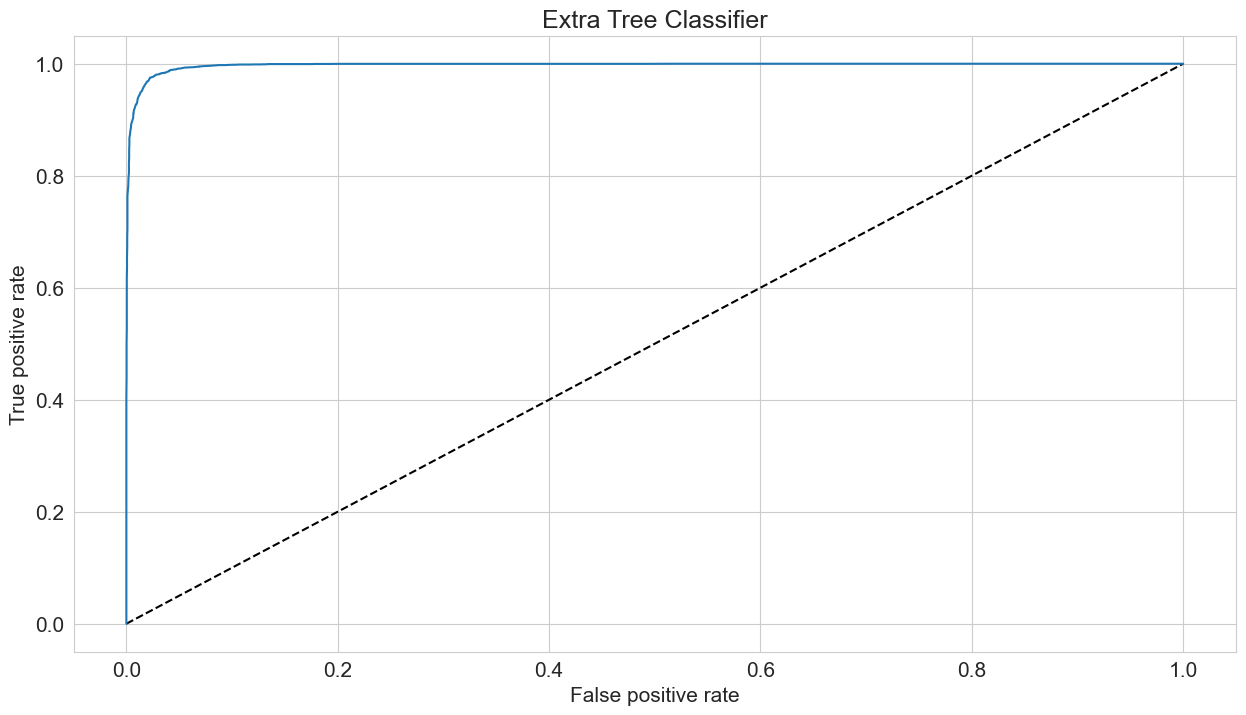

In [139]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Extra Tree Classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Extra Tree Classifier')
plt.show()

## Let us SAVE the MODEL

In [140]:
import pickle
filename='Bank_TermDeposit_Pred.pkl'
pickle.dump(Final_model,open(filename,'wb'))

In [141]:
model=pickle.load(open("Bank_TermDeposit_Pred.pkl","rb"))
prediction=model.predict(bank_test)
prediction

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [142]:
prediction2=model.predict(x_test)
prediction2

array([0, 1, 0, ..., 0, 1, 1], dtype=int64)

In [143]:
a=np.array(y_test)
df4=pd.DataFrame()
df4["Predicted Result"]=prediction2
df4["Original Result"] = a
df4

,Predicted Result,Original Result
0,0,0
1,1,1
2,0,0
3,0,0
4,1,1
...,...,...
9827,0,0
9828,0,0
9829,0,0
9830,1,1


## Thank You